# Credit score Classification model

## Import necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.simplefilter(action="ignore")
pd.set_option('display.max_columns', None)
sns.set('notebook')

#### Load dataset

In [3]:
data = pd.read_csv('data/credit.csv')
data.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,5634,3392,1,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3.0,7.0,11.27,4.0,Good,809.98,26.822620,265.0,No,49.574949,21.46538,High_spent_Small_value_payments,312.494089,Good
1,5635,3392,2,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3.0,4.0,11.27,4.0,Good,809.98,31.944960,266.0,No,49.574949,21.46538,Low_spent_Large_value_payments,284.629162,Good
2,5636,3392,3,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3.0,7.0,11.27,4.0,Good,809.98,28.609352,267.0,No,49.574949,21.46538,Low_spent_Medium_value_payments,331.209863,Good
3,5637,3392,4,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5.0,4.0,6.27,4.0,Good,809.98,31.377862,268.0,No,49.574949,21.46538,Low_spent_Small_value_payments,223.451310,Good
4,5638,3392,5,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6.0,4.0,11.27,4.0,Good,809.98,24.797347,269.0,No,49.574949,21.46538,High_spent_Medium_value_payments,341.489231,Good


In [4]:
#Dimension of the dataset
data.shape

(100000, 28)

#### Analyse the dataset

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  int64  
 1   Customer_ID               100000 non-null  int64  
 2   Month                     100000 non-null  int64  
 3   Name                      100000 non-null  object 
 4   Age                       100000 non-null  float64
 5   SSN                       100000 non-null  float64
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  float64
 8   Monthly_Inhand_Salary     100000 non-null  float64
 9   Num_Bank_Accounts         100000 non-null  float64
 10  Num_Credit_Card           100000 non-null  float64
 11  Interest_Rate             100000 non-null  float64
 12  Num_of_Loan               100000 non-null  float64
 13  Type_of_Loan              100000 non-null  ob

Dataset contains 21 numerical columns and 7 categorical coumns. Credit_score is the target column.

In [6]:
data.nunique()

ID                          100000
Customer_ID                  12500
Month                            8
Name                         10128
Age                             43
SSN                          12500
Occupation                      15
Annual_Income                12488
Monthly_Inhand_Salary        13241
Num_Bank_Accounts               12
Num_Credit_Card                 12
Interest_Rate                   34
Num_of_Loan                     10
Type_of_Loan                  6261
Delay_from_due_date             63
Num_of_Delayed_Payment          26
Changed_Credit_Limit          3452
Num_Credit_Inquiries            18
Credit_Mix                       3
Outstanding_Debt             12203
Credit_Utilization_Ratio    100000
Credit_History_Age             404
Payment_of_Min_Amount            3
Total_EMI_per_month          11890
Amount_invested_monthly      12261
Payment_Behaviour                6
Monthly_Balance              98494
Credit_Score                     3
dtype: int64

In [7]:
data.describe(include = 'all')

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
count,100000.000000,100000.000000,100000.000000,100000,100000.000000,1.000000e+05,100000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000,100000.00000,100000.000000,100000.000000,100000.000000,100000,100000.000000,100000.000000,100000.000000,100000,100000.000000,100000.000000,100000,100000.000000,100000
unique,NaN,NaN,NaN,10128,NaN,NaN,15,NaN,NaN,NaN,NaN,NaN,NaN,6261,NaN,NaN,NaN,NaN,3,NaN,NaN,NaN,3,NaN,NaN,6,NaN,3
top,NaN,NaN,NaN,Jessicad,NaN,NaN,Lawyer,NaN,NaN,NaN,NaN,NaN,NaN,No Data,NaN,NaN,NaN,NaN,Standard,NaN,NaN,NaN,Yes,NaN,NaN,Low_spent_Small_value_payments,NaN,Standard
freq,NaN,NaN,NaN,48,NaN,NaN,7096,NaN,NaN,NaN,NaN,NaN,NaN,11408,NaN,NaN,NaN,NaN,45848,NaN,NaN,NaN,52326,NaN,NaN,28616,NaN,53174
mean,80631.500000,25982.666640,4.500000,NaN,33.316340,5.004617e+08,NaN,50505.123449,4197.270835,5.368820,5.533570,14.53208,3.532880,NaN,21.08141,13.313120,10.470323,5.798250,NaN,1426.220376,32.285173,221.220460,NaN,107.699208,55.101315,NaN,392.697586,NaN
std,43301.486619,14340.543051,2.291299,NaN,10.764812,2.908267e+08,NaN,38299.422093,3186.432497,2.593314,2.067098,8.74133,2.446356,NaN,14.80456,6.237166,6.609481,3.867826,NaN,1155.129026,5.116875,99.680716,NaN,132.267056,39.006932,NaN,201.652719,NaN
min,5634.000000,1006.000000,1.000000,NaN,14.000000,8.134900e+04,NaN,7005.930000,303.645417,0.000000,0.000000,1.00000,0.000000,NaN,0.00000,0.000000,0.500000,0.000000,NaN,0.230000,20.000000,1.000000,NaN,0.000000,0.000000,NaN,0.007760,NaN
25%,43132.750000,13664.500000,2.750000,NaN,24.000000,2.451686e+08,NaN,19342.972500,1626.594167,3.000000,4.000000,7.00000,2.000000,NaN,10.00000,9.000000,5.380000,3.000000,NaN,566.072500,28.052567,144.000000,NaN,29.268886,27.959111,NaN,267.615983,NaN
50%,80631.500000,25777.000000,4.500000,NaN,33.000000,5.006886e+08,NaN,36999.705000,3095.905000,5.000000,5.000000,13.00000,3.000000,NaN,18.00000,14.000000,9.400000,5.000000,NaN,1166.155000,32.305784,219.000000,NaN,66.462304,45.156550,NaN,333.865366,NaN
75%,118130.250000,38385.000000,6.250000,NaN,42.000000,7.560027e+08,NaN,71683.470000,5957.715000,7.000000,7.000000,20.00000,5.000000,NaN,28.00000,18.000000,14.850000,8.000000,NaN,1945.962500,36.496663,302.000000,NaN,147.392573,71.295797,NaN,463.215683,NaN


In [8]:
data.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

In [9]:
# Analyse data. Find type of loans
grouped_data = data.groupby('Customer_ID')['Type_of_Loan'].apply(list)
grouped_data

Customer_ID
1006     [Credit-Builder Loan, and Payday Loan, Credit-...
1007     [Home Equity Loan, Mortgage Loan, and Student ...
1008     [No Data, No Data, No Data, No Data, No Data, ...
1009     [Credit-Builder Loan, Student Loan, Not Specif...
1011     [Personal Loan, Auto Loan, and Auto Loan, Pers...
                               ...                        
50984    [Home Equity Loan, Mortgage Loan, Payday Loan,...
50990    [Mortgage Loan, Auto Loan, and Auto Loan, Mort...
50992    [Student Loan, Credit-Builder Loan, Mortgage L...
50996    [No Data, No Data, No Data, No Data, No Data, ...
50999    [Credit-Builder Loan, Credit-Builder Loan, Cre...
Name: Type_of_Loan, Length: 12500, dtype: object

In [10]:
#checking for duplicate rows
data.duplicated().sum()


0

In [11]:
data.drop(['Customer_ID','ID','Name','SSN'],axis=1,inplace=True)#Drop unwanted columns. it doesn't make any sense.

Credit score is the Target column,checking percentage of each values

In [12]:
data['Credit_Score'].value_counts(normalize=True) * 100


Credit_Score
Standard    53.174
Poor        28.998
Good        17.828
Name: proportion, dtype: float64

Target column is imbalanced. Good score's percentage is very low .

In [13]:
data['Credit_Mix'].value_counts(normalize=True) * 100

Credit_Mix
Standard    45.848
Good        30.384
Bad         23.768
Name: proportion, dtype: float64

In [14]:
data['Payment_Behaviour'].value_counts(normalize=True) * 100

Payment_Behaviour
Low_spent_Small_value_payments      28.616
High_spent_Medium_value_payments    19.738
High_spent_Large_value_payments     14.726
Low_spent_Medium_value_payments     14.399
High_spent_Small_value_payments     11.764
Low_spent_Large_value_payments      10.757
Name: proportion, dtype: float64

In [15]:
data['Num_Bank_Accounts'].value_counts(normalize=True) * 100

Num_Bank_Accounts
6.0     13.175
7.0     12.999
8.0     12.940
4.0     12.343
5.0     12.298
3.0     12.107
9.0      5.503
10.0     5.329
1.0      4.540
0.0      4.417
2.0      4.340
11.0     0.009
Name: proportion, dtype: float64

In [16]:
data['Num_Credit_Card'].value_counts(normalize=True) * 100

Num_Credit_Card
5.0     18.903
7.0     17.024
6.0     16.932
4.0     14.362
3.0     13.560
8.0      5.073
10.0     4.962
9.0      4.753
2.0      2.196
1.0      2.185
11.0     0.036
0.0      0.014
Name: proportion, dtype: float64

# EDA

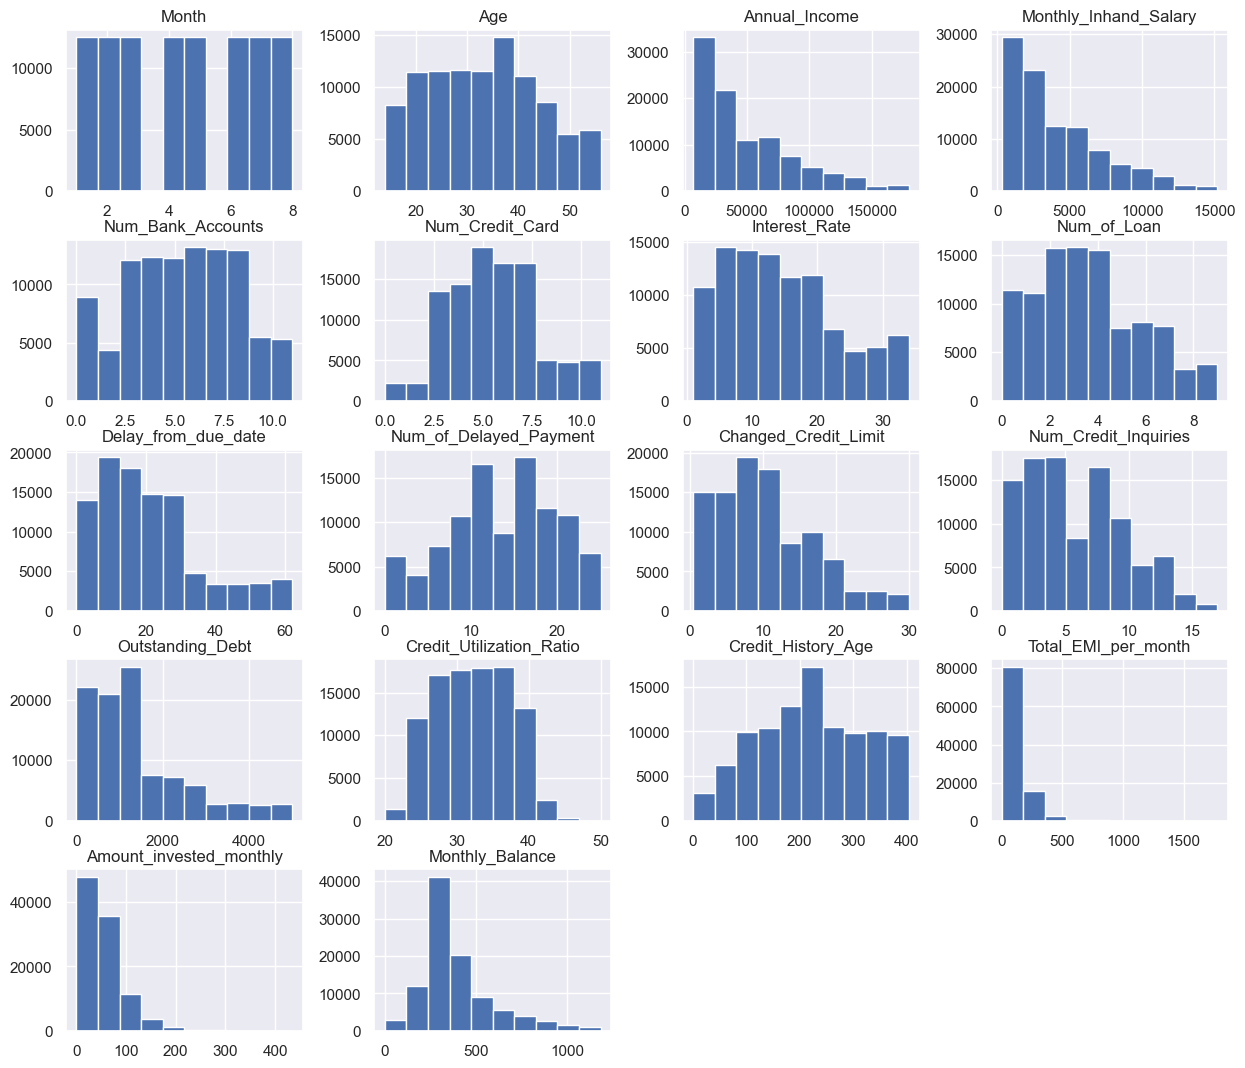

In [17]:
#Distribution of data
freqgraph = data.select_dtypes(include=['float64','int64'])
freqgraph.hist(figsize=(15, 13))
plt.show()

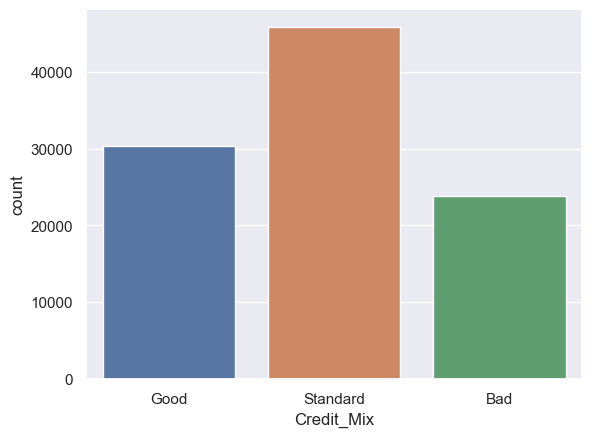

In [18]:
# Create a count plot
sns.countplot(x='Credit_Mix', data=data)
# Show the plot
plt.show()

In Credit_mix Standard value count is high.

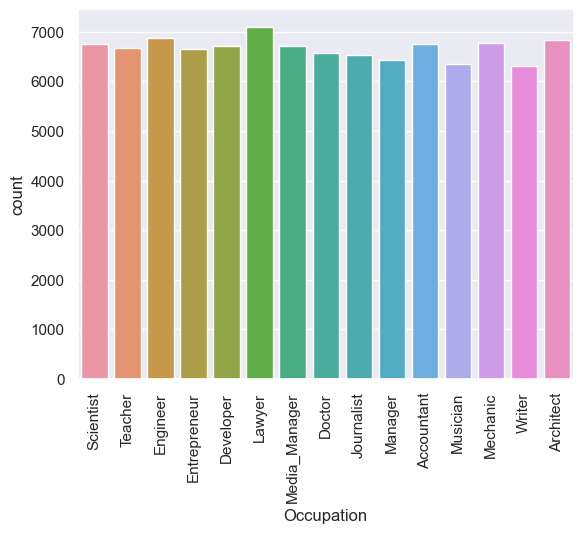

In [19]:
# Create a count plot
sns.countplot(x='Occupation', data=data)
plt.xticks(rotation=90);

# Show the plot
plt.show()

## Bi variate analysis

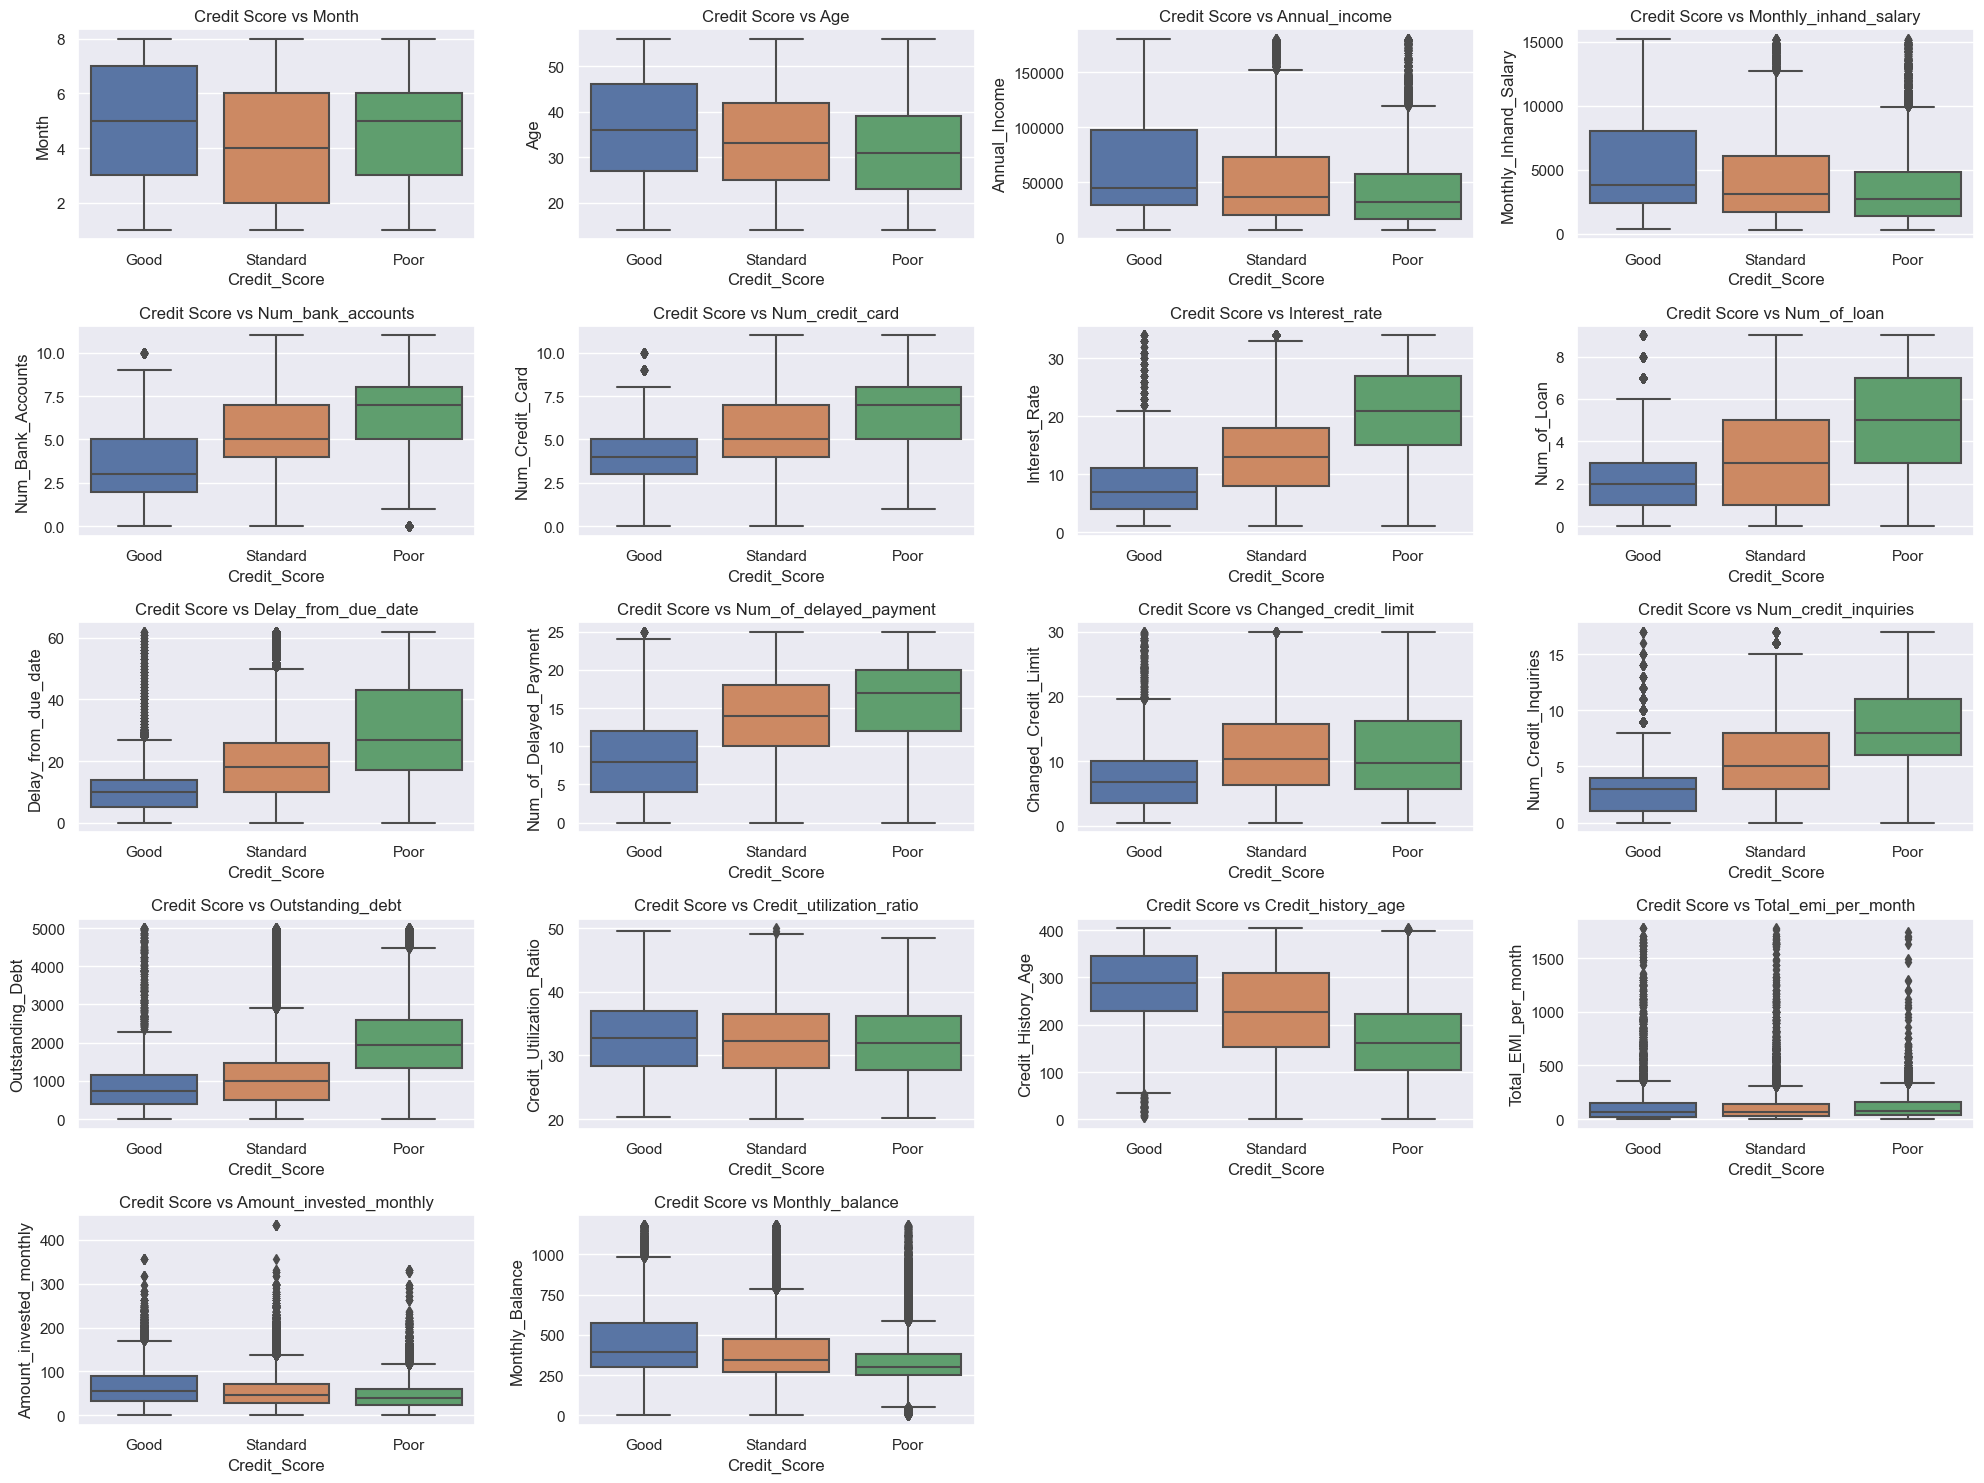

In [20]:
#box plot numerical columns
# Features to plot
features = data.select_dtypes(include=['float64','int64'])
# Create box plots
plt.figure(figsize=(20, 15))
for i, feature in enumerate(features, 1):
    plt.subplot(5, 4, i)  # Create a 2x2 grid of plots
    if data[feature].dtype == 'object':  # Categorical feature
        sns.boxplot(x=feature, y='Credit_Score', data=data)
    else:  # Continuous feature
        sns.boxplot(x='Credit_Score', y=feature, data=data)
    plt.title(f'Credit Score vs {feature.capitalize()}')

plt.tight_layout()
plt.show()

Insights:
* Credit score is better for persons have higher annual income.
* Similar to annual income, a higher monthly in-hand salary leads to a better credit score.
* If no of bank accounts higher credit score will be poor.
* Similar to bank accounts no of credit cards also negatively effect credit score.
* Interest rate,no of loans,delay fro due date,no of delayed payments and outstanding debt also negatively effect credit score.
* Credit utilization ratio doesn’t affect your credit scores.
* Having a long credit history results in better credit scores.
* Emi per month and monthly invested amount are not effecting


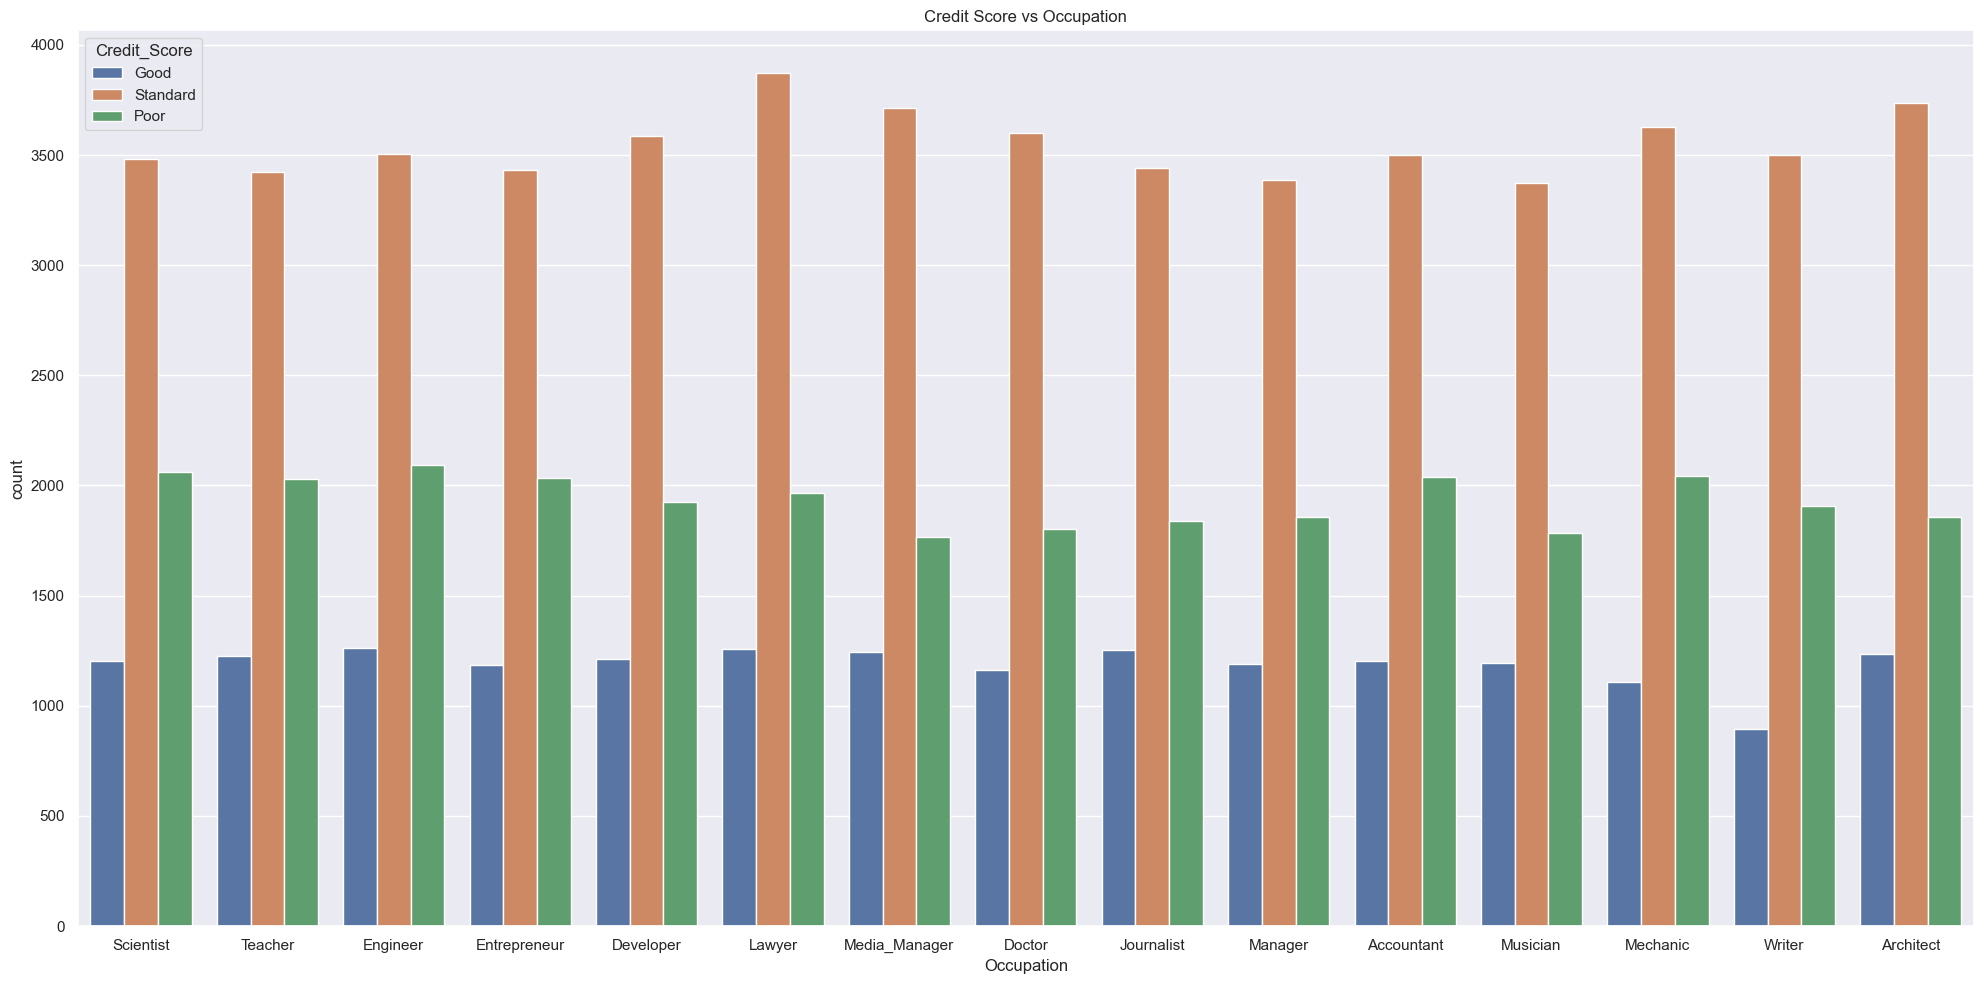

In [21]:
#Plot Credit score vs occupation
plt.figure(figsize=(20, 10))
sns.countplot(x='Occupation', hue='Credit_Score', data=data)
plt.title('Credit Score vs Occupation')
plt.tight_layout()
plt.show()


According to above graph ,Credit score not depending occupation.Almost same for all jobs.

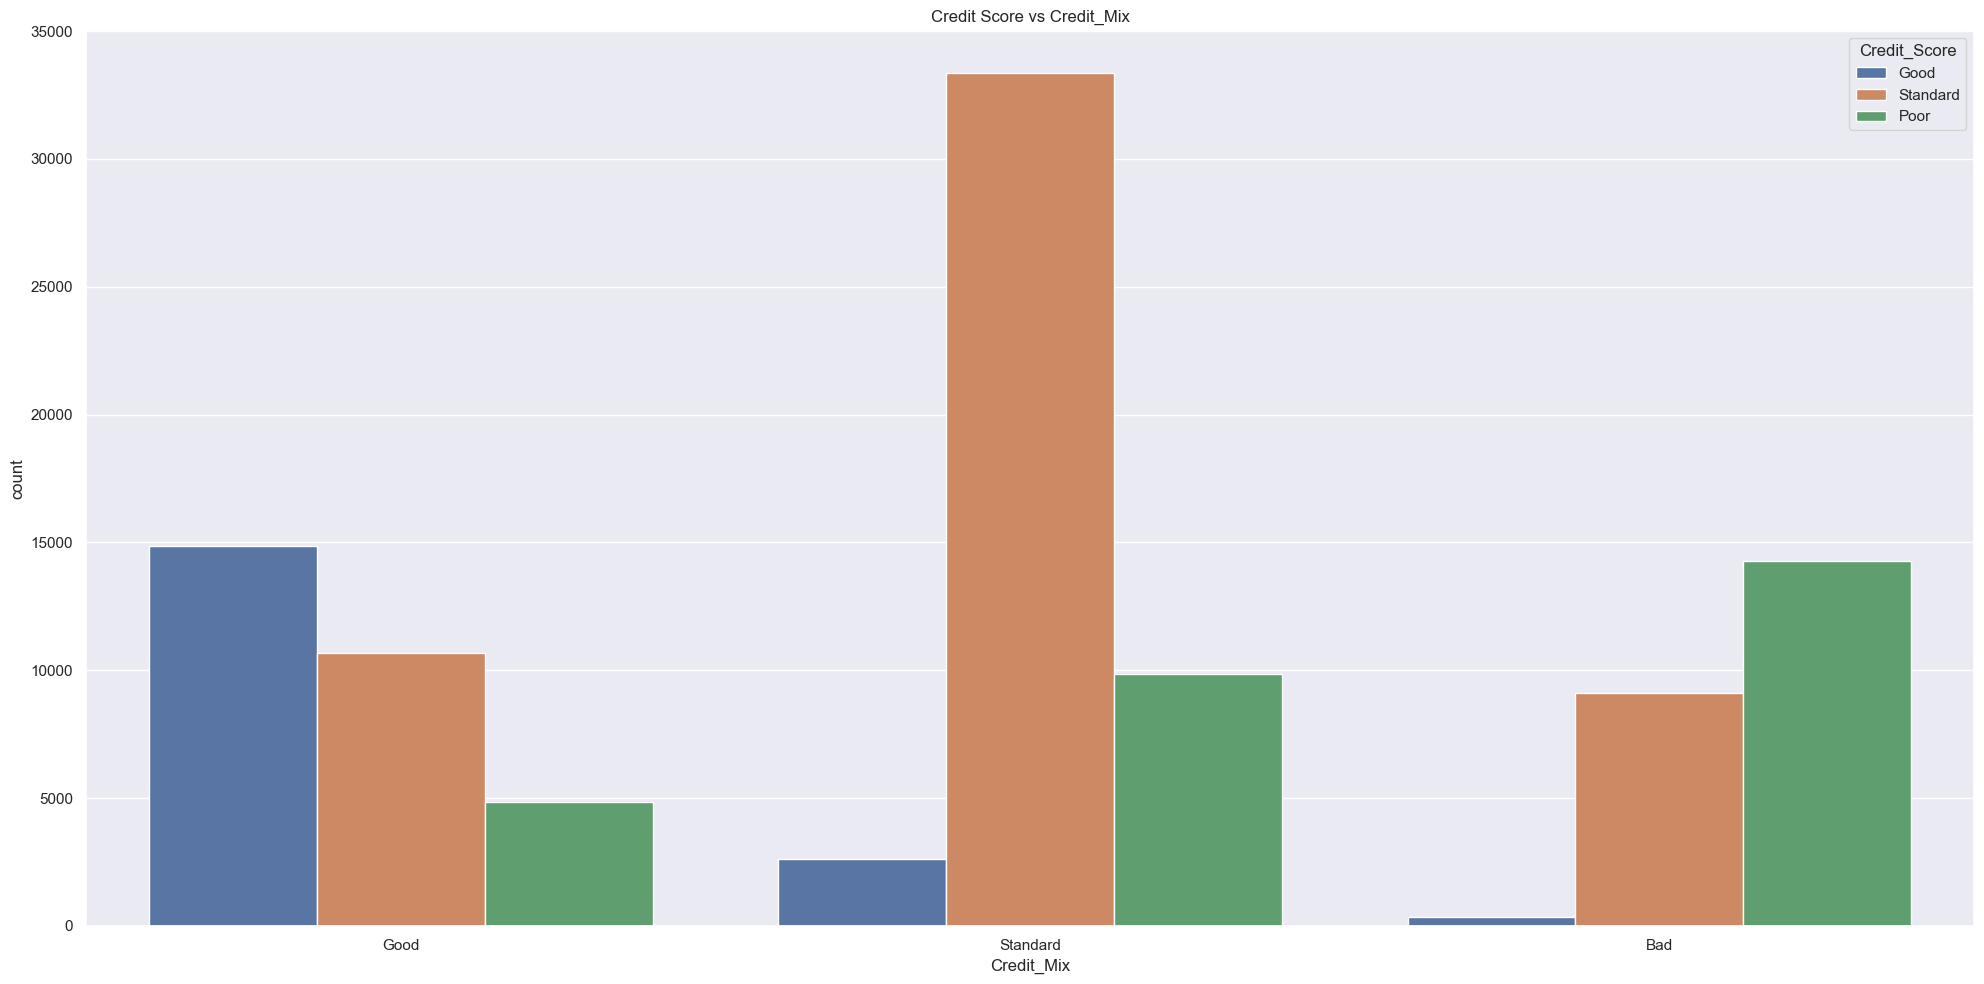

In [22]:
#Plot Credit score vs Credit mix
plt.figure(figsize=(20, 10))
sns.countplot(x='Credit_Mix', hue='Credit_Score', data=data)
plt.title('Credit Score vs Credit_Mix')
plt.tight_layout()
plt.show()

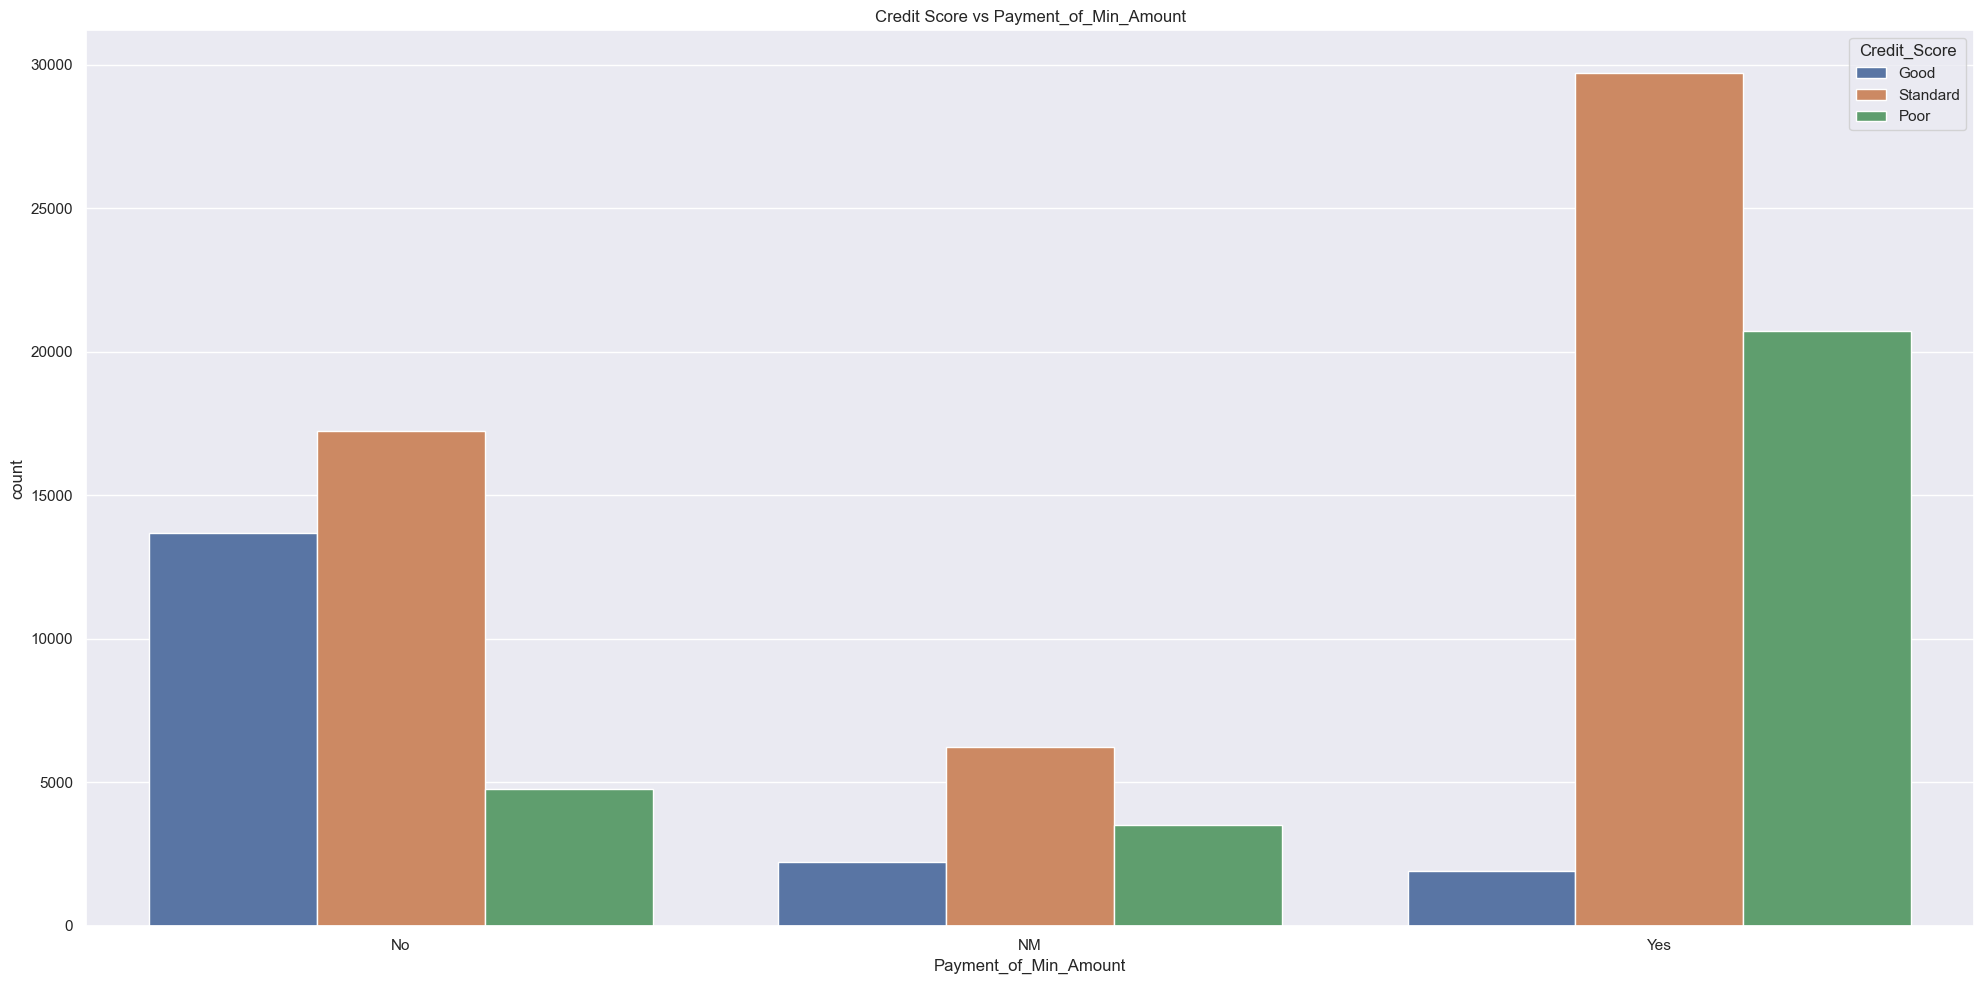

In [23]:
#Plot Credit score vs Payment_of_Min_Amount
plt.figure(figsize=(20, 10))
sns.countplot(x='Payment_of_Min_Amount', hue='Credit_Score', data=data)
plt.title('Credit Score vs Payment_of_Min_Amount')
plt.tight_layout()
plt.show()

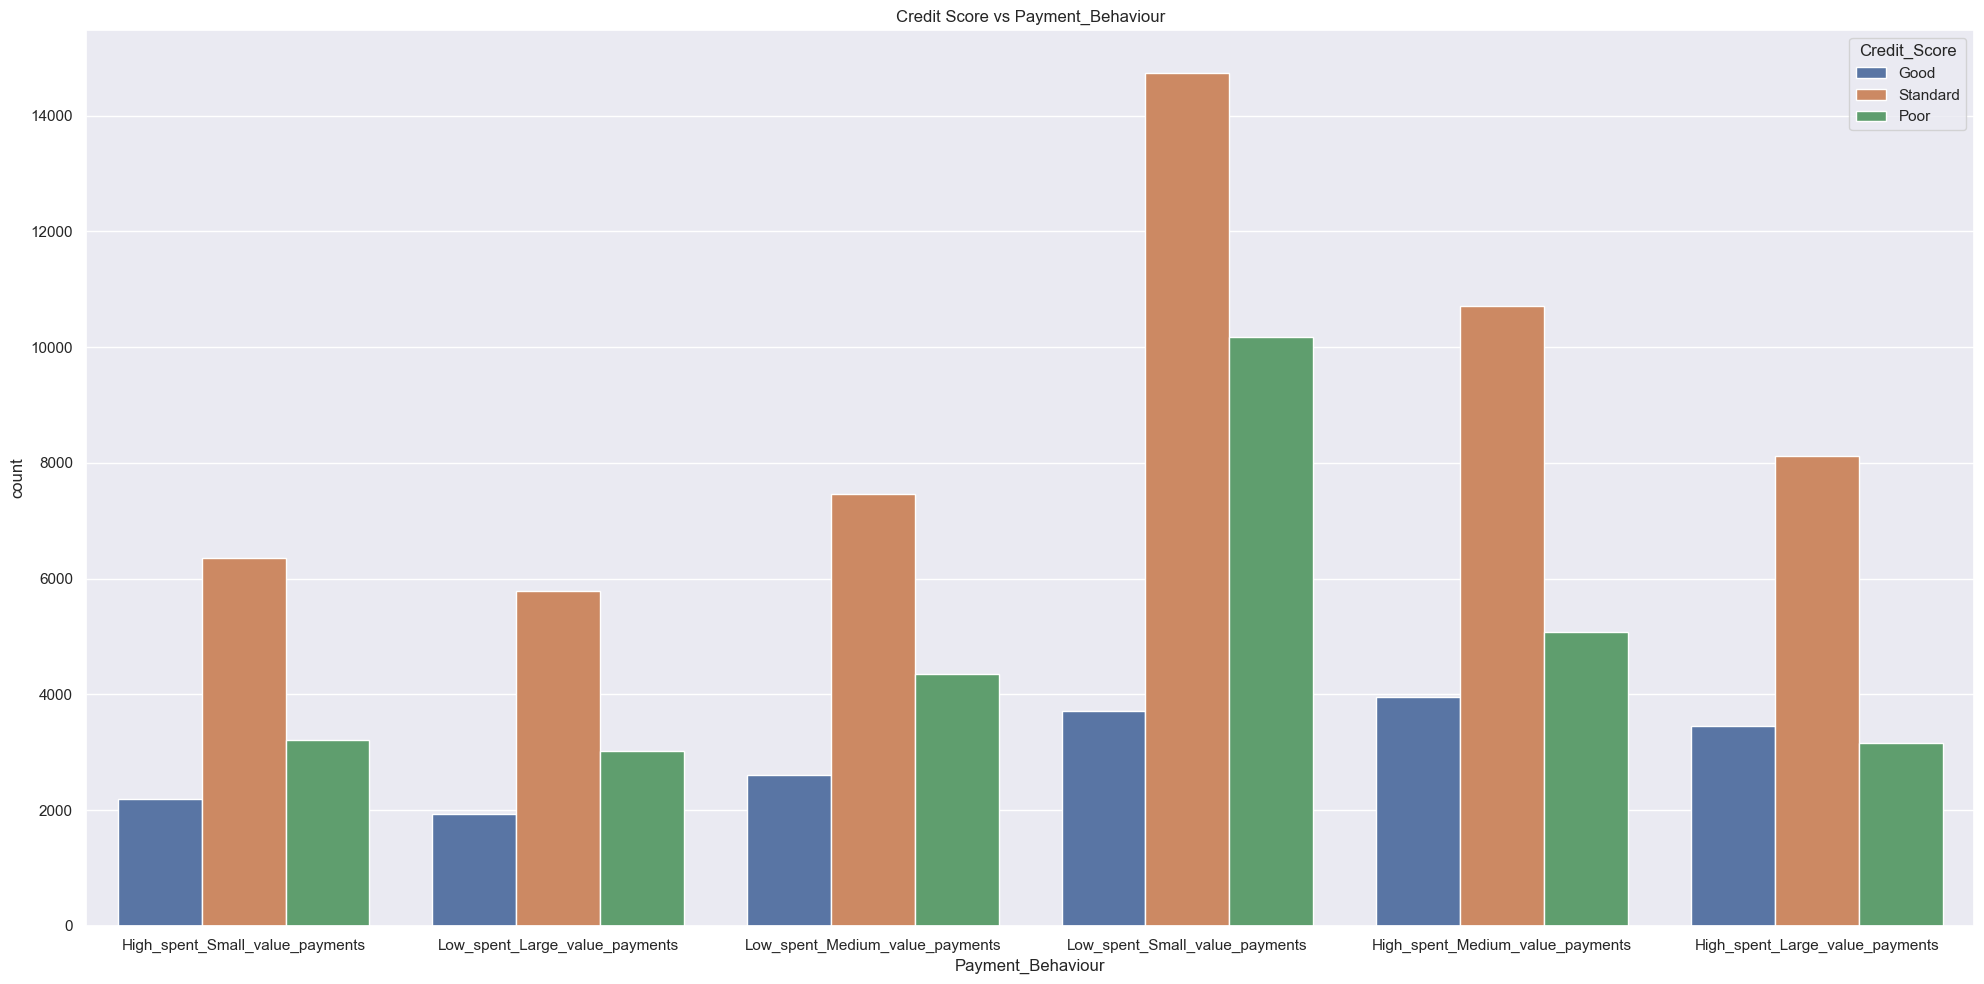

In [24]:
#Plot Credit score vs Payment_Behaviour
plt.figure(figsize=(20, 10))
sns.countplot(x='Payment_Behaviour', hue='Credit_Score', data=data)
plt.title('Credit Score vs Payment_Behaviour')
plt.tight_layout()
plt.show()

#### Plot correlation map


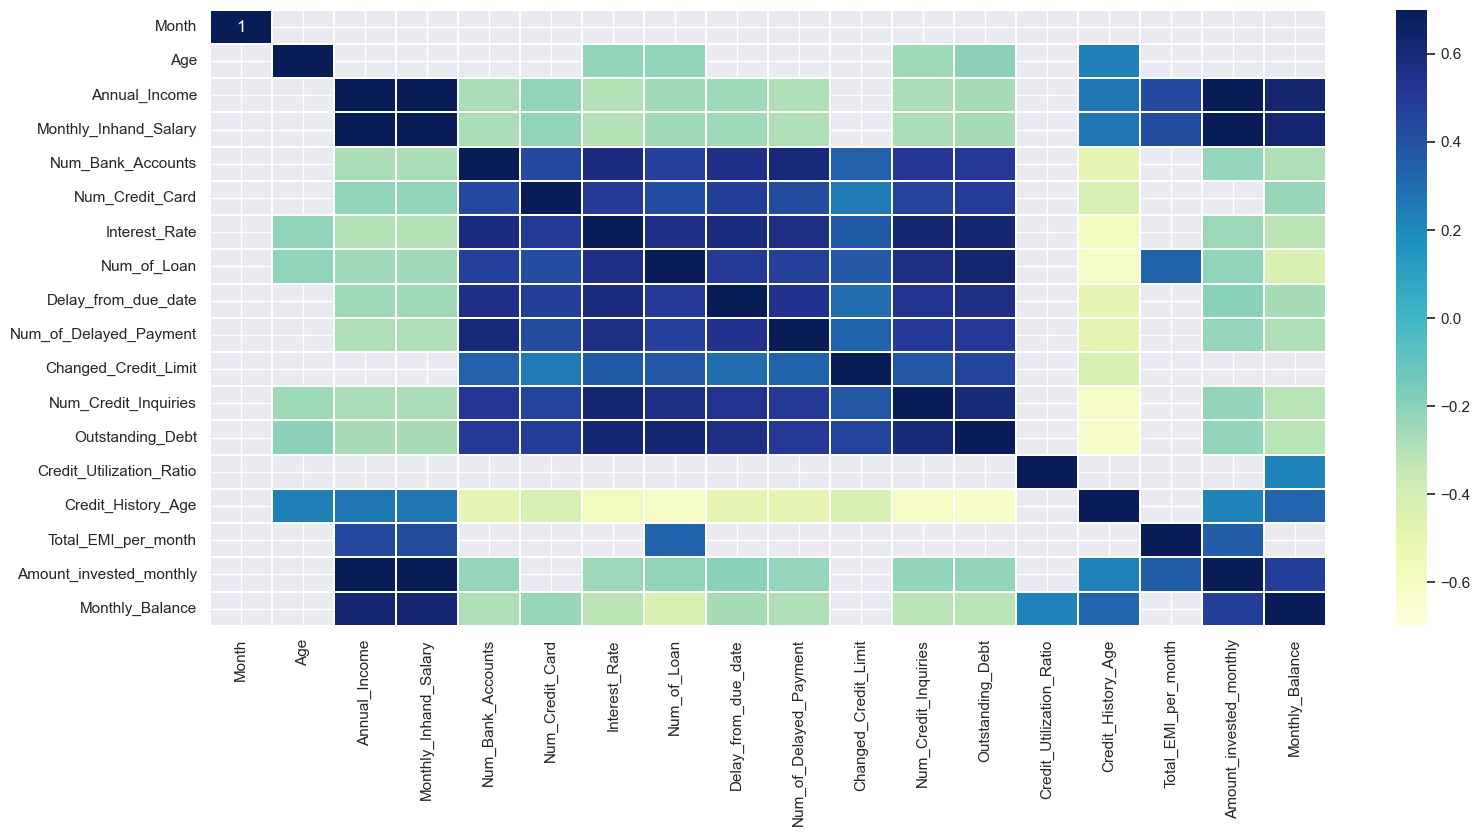

In [25]:
corr = data.select_dtypes(include = ['float64','int64']).corr()
mask = (corr <= 0.2) & (corr >= -0.2)
plt.subplots(figsize = (18,8))
sns.heatmap(corr.mask(mask),vmin=-0.7,vmax=0.7,annot=True,linewidths=0.2,cmap='YlGnBu')
plt.show()

In [26]:
# Find pairs of highly correlated features
threshold = 0.8
high_corr_pairs = [(corr.columns[i], corr.columns[j])
                   for i in range(len(corr.columns))
                   for j in range(i+1, len(corr.columns))
                   if corr.iloc[i, j] > threshold]
high_corr_pairs

[('Annual_Income', 'Monthly_Inhand_Salary'),
 ('Annual_Income', 'Amount_invested_monthly'),
 ('Monthly_Inhand_Salary', 'Amount_invested_monthly')]

Annual income ,amount invested monthly and monthly inhand salary are highly correlated. Let's drop amount invested monthly and monthly inhand salary and retian Annual income.

# Data Preprocessing

In [27]:
#Checking missing values
data.isna().sum()

Month                       0
Age                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Type_of_Loan                0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
dtype: int64

No Null Values to handle

Outlier handling

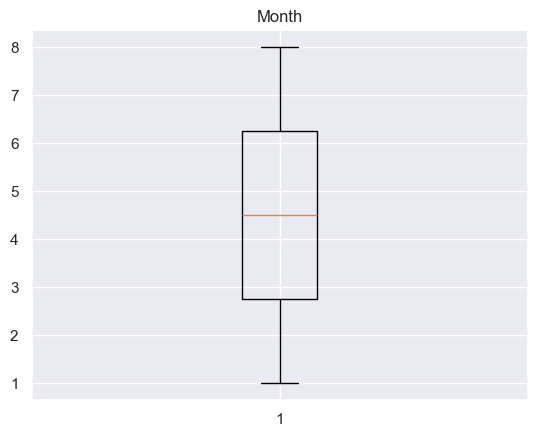

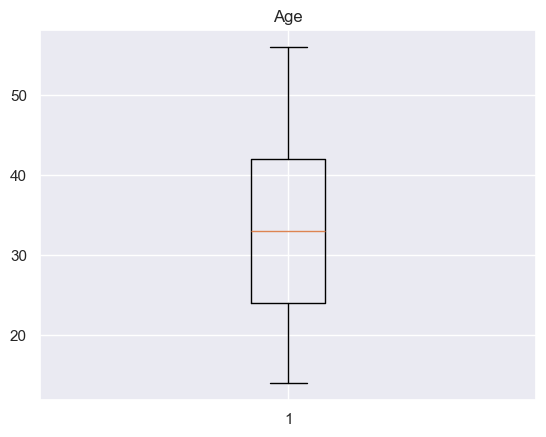

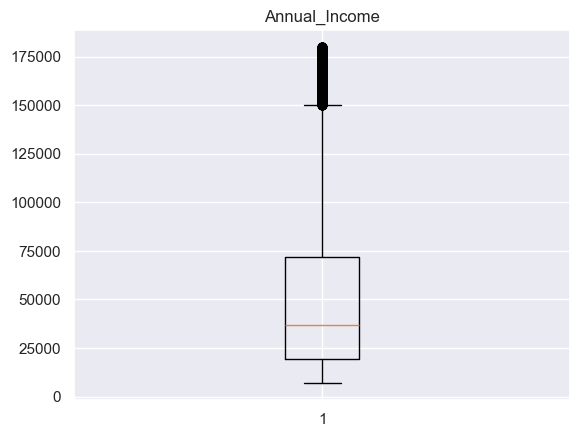

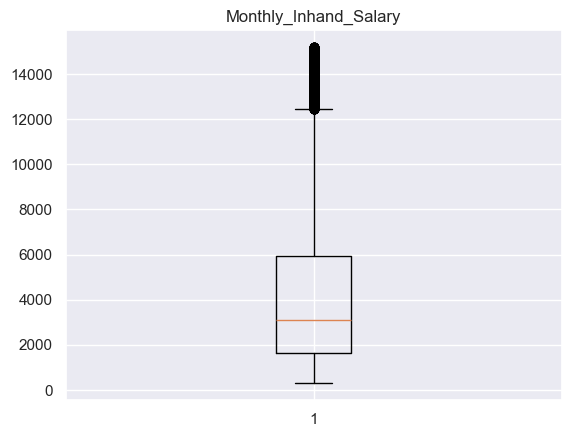

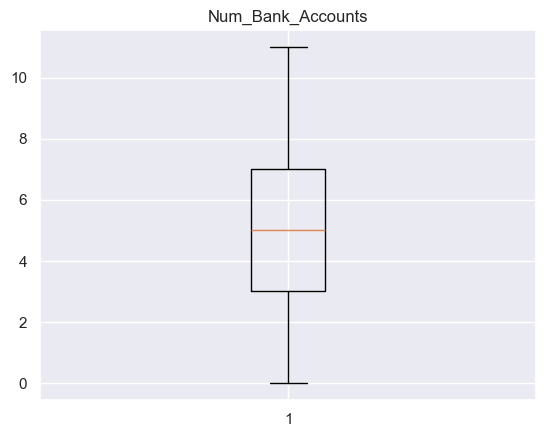

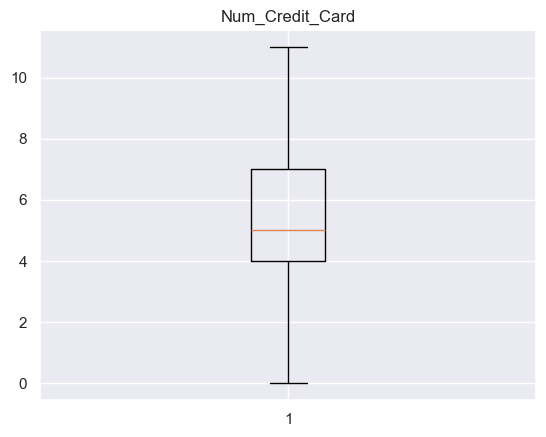

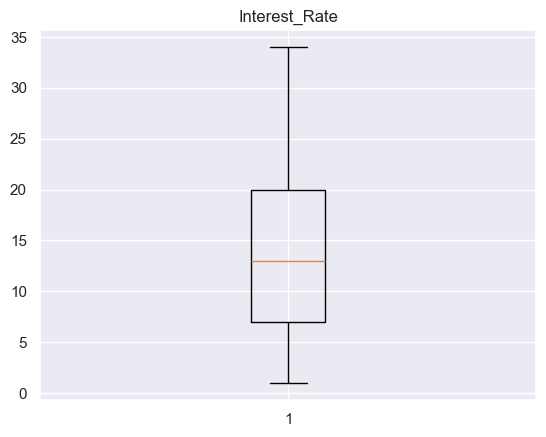

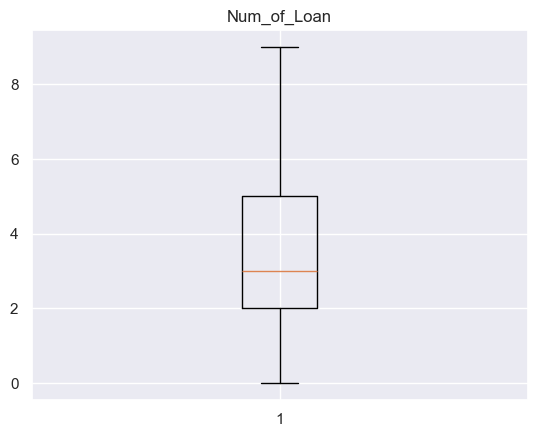

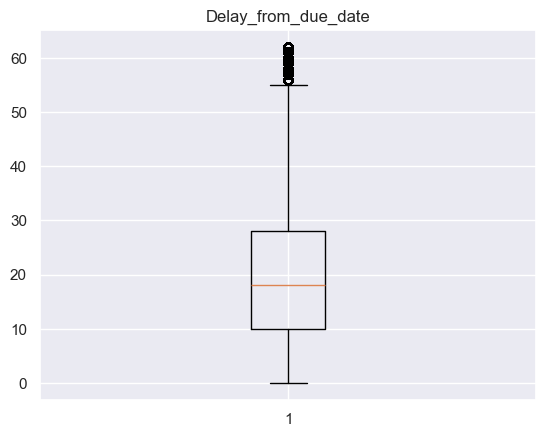

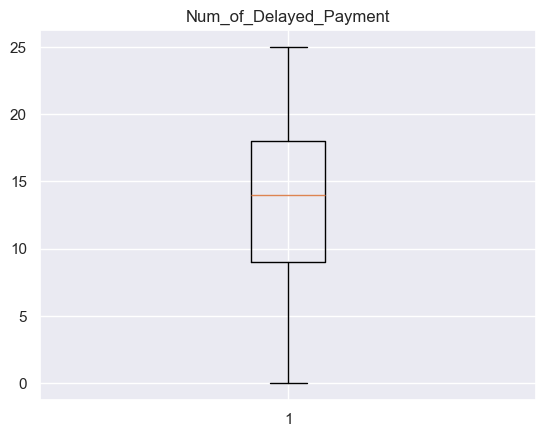

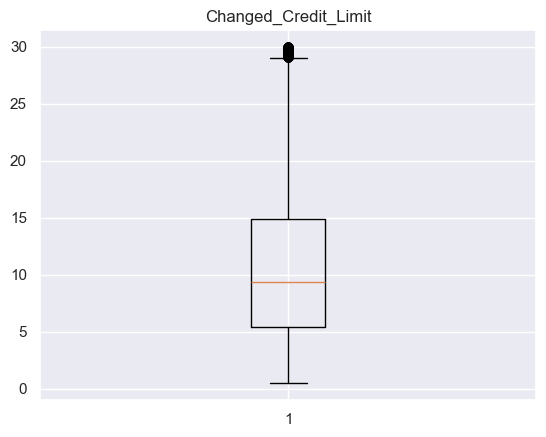

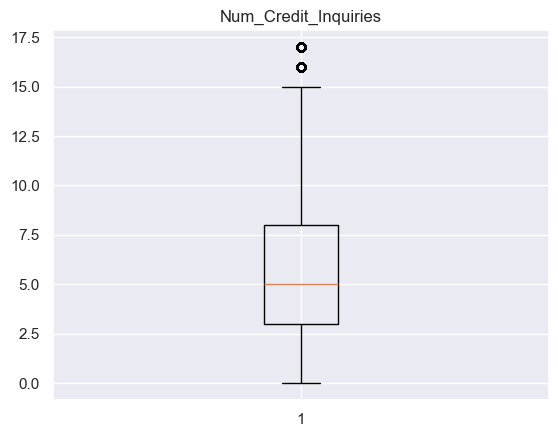

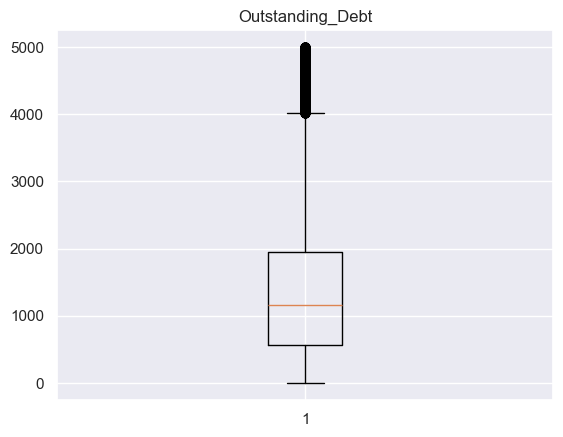

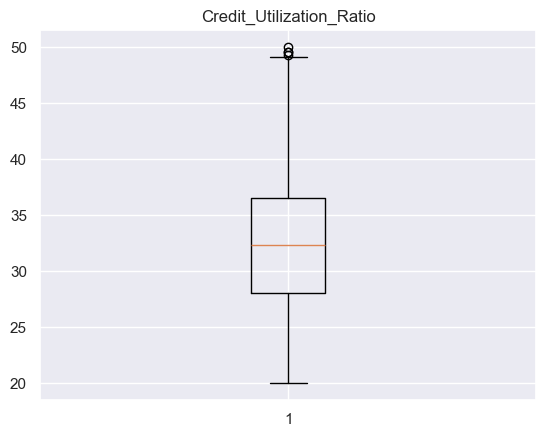

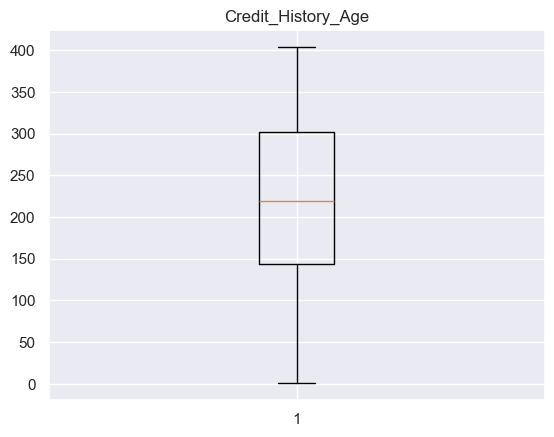

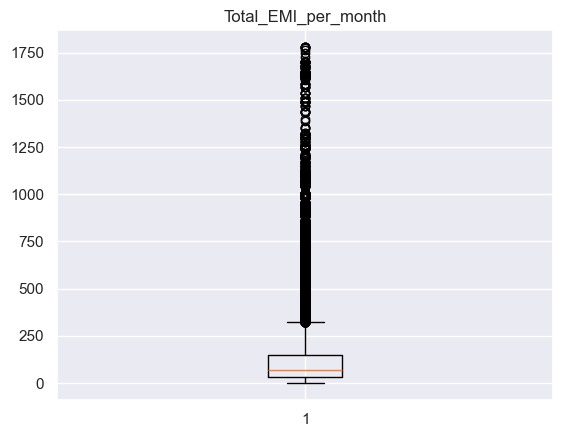

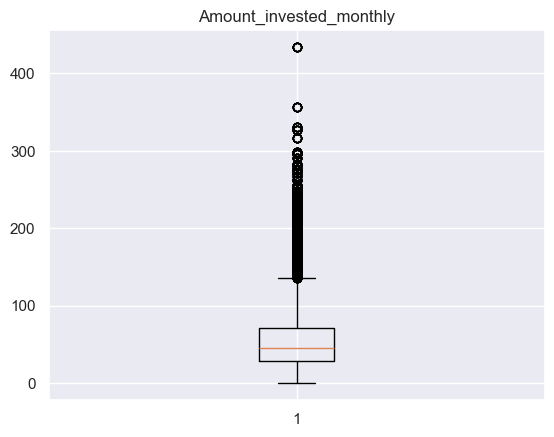

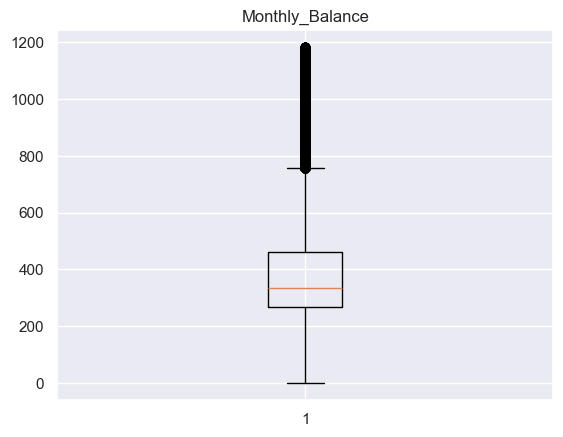

In [28]:
num_columns=data.select_dtypes(include=['float64','int64'])
for i in num_columns:
  plt.figure()
  plt.boxplot(data[i])
  plt.title(i)


We decided to keep outliers. So we are using models that can handle outlier.

In [29]:
#The Credit_Mix column is valuable for determining credit scores.It is categorical, let's convert into numerical by assigning values 0,1,2
# Before transformation
data['Credit_Mix'].unique()

array(['Good', 'Standard', 'Bad'], dtype=object)

In [30]:
data_copy=data.copy()


In [31]:
#Transforming the column in 0, 1, or 2.
data['Credit_Mix'] = data['Credit_Mix'].map({'Good': 2, 'Standard': 1, 'Bad': 0})

In [32]:
# After transformation
data['Credit_Mix'].unique()

array([2, 1, 0], dtype=int64)

In [33]:
data['Credit_Score'] = data['Credit_Score'].map({'Good': 2, 'Standard': 1, 'Poor': 0})

In [34]:
data['Credit_Score'].unique()

array([2, 1, 0], dtype=int64)

In [35]:
data['Num_Credit_Card'].replace(0,1,inplace=True)


# Encoding

#### Find unique loan types from each row

In [36]:
loan_types = set()
for loans in data['Type_of_Loan']:
    loans = loans.replace("and ", "").split(", ")
    for loan in loans:
        if loan not in loan_types:
            loan_types.add(loan)

print(loan_types)

{'Mortgage Loan', 'Auto Loan', 'Not Specified', 'Credit-Builder Loan', 'Home Equity Loan', 'Payday Loan', 'Debt Consolidation Loan', 'Personal Loan', 'No Data', 'Student Loan'}


In [37]:
for loan in loan_types: #Create column for each type of loan and set value as 0.
    data[loan]=0

In [38]:
data.head(8)

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Mortgage Loan,Auto Loan,Not Specified,Credit-Builder Loan,Home Equity Loan,Payday Loan,Debt Consolidation Loan,Personal Loan,No Data,Student Loan
0,1,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3.0,7.0,11.27,4.0,2,809.98,26.822620,265.0,No,49.574949,21.46538,High_spent_Small_value_payments,312.494089,2,0,0,0,0,0,0,0,0,0,0
1,2,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3.0,4.0,11.27,4.0,2,809.98,31.944960,266.0,No,49.574949,21.46538,Low_spent_Large_value_payments,284.629162,2,0,0,0,0,0,0,0,0,0,0
2,3,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3.0,7.0,11.27,4.0,2,809.98,28.609352,267.0,No,49.574949,21.46538,Low_spent_Medium_value_payments,331.209863,2,0,0,0,0,0,0,0,0,0,0
3,4,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5.0,4.0,6.27,4.0,2,809.98,31.377862,268.0,No,49.574949,21.46538,Low_spent_Small_value_payments,223.451310,2,0,0,0,0,0,0,0,0,0,0
4,5,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6.0,4.0,11.27,4.0,2,809.98,24.797347,269.0,No,49.574949,21.46538,High_spent_Medium_value_payments,341.489231,2,0,0,0,0,0,0,0,0,0,0
5,6,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",8.0,4.0,9.27,4.0,2,809.98,27.262259,270.0,No,49.574949,21.46538,High_spent_Medium_value_payments,340.479212,2,0,0,0,0,0,0,0,0,0,0
6,7,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3.0,8.0,11.27,4.0,2,809.98,22.537593,271.0,No,49.574949,21.46538,Low_spent_Small_value_payments,244.565317,2,0,0,0,0,0,0,0,0,0,0
7,8,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3.0,6.0,11.27,4.0,2,809.98,23.933795,272.0,No,49.574949,21.46538,High_spent_Medium_value_payments,358.124168,1,0,0,0,0,0,0,0,0,0,0


In [39]:
# Iterate over rows to process loan types
for idx, row in data.iterrows():
    if row['Type_of_Loan'] != 'No data':
        loans = row['Type_of_Loan'].replace(' and ', ', ')
        for loan in loans.split(','):
            loan = loan.strip()
             # Ensure the loan is not an empty string before proceeding
            if loan:        
                # Check if the column exists; if not, create it with default value 0
                if loan not in data.columns:
                    data[loan] = 0
                # Set the value to 1 for the current row
                data.at[idx, loan] = 1

Added Type of loan columns and set value 1 if that column name is present in Type_of_loan column.  This to make type_of_loan column numeric and then drop Type_of_Loan column.

In [40]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
le = LabelEncoder()


One hot encode object columns

In [41]:
obj_columns = data.select_dtypes(include=['object']).columns
print(obj_columns)
exclude_columns = ['Type_of_Loan']
categorical_columns = [col for col in obj_columns if col not in exclude_columns]

encoder ={}
for col in categorical_columns:
    oe = OneHotEncoder(drop='first', sparse_output=False, dtype=int)
    transformed_data = oe.fit_transform(data[[col]])
    transformed_df = pd.DataFrame(transformed_data, columns=oe.get_feature_names_out([col]))

    # Drop the original column and concatenate the new one-hot encoded columns
    data = data.drop(col, axis=1).join(transformed_df)
    encoder[col] = oe


Index(['Occupation', 'Type_of_Loan', 'Payment_of_Min_Amount',
       'Payment_Behaviour'],
      dtype='object')


In [42]:
data.head(15)

,Month,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Credit_Score,Mortgage Loan,Auto Loan,Not Specified,Credit-Builder Loan,Home Equity Loan,Payday Loan,Debt Consolidation Loan,Personal Loan,No Data,Student Loan,Occupation_Architect,Occupation_Developer,Occupation_Doctor,Occupation_Engineer,Occupation_Entrepreneur,Occupation_Journalist,Occupation_Lawyer,Occupation_Manager,Occupation_Mechanic,Occupation_Media_Manager,Occupation_Musician,Occupation_Scientist,Occupation_Teacher,Occupation_Writer,Payment_of_Min_Amount_No,Payment_of_Min_Amount_Yes,Payment_Behaviour_High_spent_Medium_value_payments,Payment_Behaviour_High_spent_Small_value_payments,Payment_Behaviour_Low_spent_Large_value_payments,Payment_Behaviour_Low_spent_Medium_value_payments,Payment_Behaviour_Low_spent_Small_value_payments
0,1,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3.0,7.0,11.27,4.0,2,809.98,26.822620,265.0,49.574949,21.465380,312.494089,2,0,1,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0
1,2,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3.0,4.0,11.27,4.0,2,809.98,31.944960,266.0,49.574949,21.465380,284.629162,2,0,1,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0
2,3,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3.0,7.0,11.27,4.0,2,809.98,28.609352,267.0,49.574949,21.465380,331.209863,2,0,1,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0
3,4,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5.0,4.0,6.27,4.0,2,809.98,31.377862,268.0,49.574949,21.465380,223.451310,2,0,1,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1
4,5,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6.0,4.0,11.27,4.0,2,809.98,24.797347,269.0,49.574949,21.465380,341.489231,2,0,1,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0
5,6,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",8.0,4.0,9.27,4.0,2,809.98,27.262259,270.0,49.574949,21.465380,340.479212,2,0,1,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0
6,7,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3.0,8.0,11.27,4.0,2,809.98,22.537593,271.0,49.574949,21.465380,244.565317,2,0,1,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1
7,8,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3.0,6.0,11.27,4.0,2,809.98,23.933795,272.0,49.574949,21.465380,358.124168,1,0,1,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0
8,1,28.0,34847.84,3037.986667,2.0,4.0,6.0,1.0,Credit-Builder Loan,3.0,4.0,5.42,2.0,2,605.03,24.464031,319.0,18.816215,39.684018,470.690627,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1
9,2,28.0,34847.84,3037.986667,2.0,4.0,6.0,1.0,Credit-Builder Loan,7.0,1.0,7.42,2.0,2,605.03,38.550848,320.0,18.816215,39.684018,484.591214,2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0


In [43]:
data.shape

(100000, 52)

Let’s split the data into the target and feature variables.


In [44]:
data.columns


Index(['Month', 'Age', 'Annual_Income', 'Monthly_Inhand_Salary',
       'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Type_of_Loan', 'Delay_from_due_date', 'Num_of_Delayed_Payment',
       'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Credit_Mix',
       'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Total_EMI_per_month', 'Amount_invested_monthly', 'Monthly_Balance',
       'Credit_Score', 'Mortgage Loan', 'Auto Loan', 'Not Specified',
       'Credit-Builder Loan', 'Home Equity Loan', 'Payday Loan',
       'Debt Consolidation Loan', 'Personal Loan', 'No Data', 'Student Loan',
       'Occupation_Architect', 'Occupation_Developer', 'Occupation_Doctor',
       'Occupation_Engineer', 'Occupation_Entrepreneur',
       'Occupation_Journalist', 'Occupation_Lawyer', 'Occupation_Manager',
       'Occupation_Mechanic', 'Occupation_Media_Manager',
       'Occupation_Musician', 'Occupation_Scientist', 'Occupation_Teacher',
       

In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 52 columns):
 #   Column                                              Non-Null Count   Dtype  
---  ------                                              --------------   -----  
 0   Month                                               100000 non-null  int64  
 1   Age                                                 100000 non-null  float64
 2   Annual_Income                                       100000 non-null  float64
 3   Monthly_Inhand_Salary                               100000 non-null  float64
 4   Num_Bank_Accounts                                   100000 non-null  float64
 5   Num_Credit_Card                                     100000 non-null  float64
 6   Interest_Rate                                       100000 non-null  float64
 7   Num_of_Loan                                         100000 non-null  float64
 8   Type_of_Loan                                        100000 non-nu

In [46]:
# Calculate the total outstanding debt per account

data['Debt_Per_Card'] = data['Outstanding_Debt'] / data['Num_Credit_Card']

# Calculate the ratio of outstanding debt to annual income

data['Debt_to_Income_Ratio'] = data['Outstanding_Debt'] / data['Annual_Income']

# Calculate the total number of delayed payments per account

data['Delayed_Payments_Per_Card'] = data['Num_of_Delayed_Payment'] / data['Num_Credit_Card']

# Calculate the total monthly expenses (EMI + Monthly Investments)

data['Total_Monthly_Expenses'] = data['Total_EMI_per_month'] + data['Amount_invested_monthly']

In [47]:
data.head()

,Month,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Credit_Score,Mortgage Loan,Auto Loan,Not Specified,Credit-Builder Loan,Home Equity Loan,Payday Loan,Debt Consolidation Loan,Personal Loan,No Data,Student Loan,Occupation_Architect,Occupation_Developer,Occupation_Doctor,Occupation_Engineer,Occupation_Entrepreneur,Occupation_Journalist,Occupation_Lawyer,Occupation_Manager,Occupation_Mechanic,Occupation_Media_Manager,Occupation_Musician,Occupation_Scientist,Occupation_Teacher,Occupation_Writer,Payment_of_Min_Amount_No,Payment_of_Min_Amount_Yes,Payment_Behaviour_High_spent_Medium_value_payments,Payment_Behaviour_High_spent_Small_value_payments,Payment_Behaviour_Low_spent_Large_value_payments,Payment_Behaviour_Low_spent_Medium_value_payments,Payment_Behaviour_Low_spent_Small_value_payments,Debt_Per_Card,Debt_to_Income_Ratio,Delayed_Payments_Per_Card,Total_Monthly_Expenses
0,1,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3.0,7.0,11.27,4.0,2,809.98,26.822620,265.0,49.574949,21.46538,312.494089,2,0,1,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,202.495,0.042376,1.75,71.040329
1,2,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3.0,4.0,11.27,4.0,2,809.98,31.944960,266.0,49.574949,21.46538,284.629162,2,0,1,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,202.495,0.042376,1.00,71.040329
2,3,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3.0,7.0,11.27,4.0,2,809.98,28.609352,267.0,49.574949,21.46538,331.209863,2,0,1,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,202.495,0.042376,1.75,71.040329
3,4,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5.0,4.0,6.27,4.0,2,809.98,31.377862,268.0,49.574949,21.46538,223.451310,2,0,1,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,202.495,0.042376,1.00,71.040329
4,5,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6.0,4.0,11.27,4.0,2,809.98,24.797347,269.0,49.574949,21.46538,341.489231,2,0,1,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,202.495,0.042376,1.00,71.040329


In [48]:
data.head(2)

,Month,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Credit_Score,Mortgage Loan,Auto Loan,Not Specified,Credit-Builder Loan,Home Equity Loan,Payday Loan,Debt Consolidation Loan,Personal Loan,No Data,Student Loan,Occupation_Architect,Occupation_Developer,Occupation_Doctor,Occupation_Engineer,Occupation_Entrepreneur,Occupation_Journalist,Occupation_Lawyer,Occupation_Manager,Occupation_Mechanic,Occupation_Media_Manager,Occupation_Musician,Occupation_Scientist,Occupation_Teacher,Occupation_Writer,Payment_of_Min_Amount_No,Payment_of_Min_Amount_Yes,Payment_Behaviour_High_spent_Medium_value_payments,Payment_Behaviour_High_spent_Small_value_payments,Payment_Behaviour_Low_spent_Large_value_payments,Payment_Behaviour_Low_spent_Medium_value_payments,Payment_Behaviour_Low_spent_Small_value_payments,Debt_Per_Card,Debt_to_Income_Ratio,Delayed_Payments_Per_Card,Total_Monthly_Expenses
0,1,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3.0,7.0,11.27,4.0,2,809.98,26.82262,265.0,49.574949,21.46538,312.494089,2,0,1,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,202.495,0.042376,1.75,71.040329
1,2,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3.0,4.0,11.27,4.0,2,809.98,31.94496,266.0,49.574949,21.46538,284.629162,2,0,1,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,202.495,0.042376,1.00,71.040329


In [49]:
data.drop(['Monthly_Inhand_Salary','Amount_invested_monthly','Type_of_Loan'],axis=1,inplace=True)

In [50]:
x = data.drop(columns = ['Credit_Score'],axis=1)
y = data['Credit_Score']


In [51]:
features = ['Outstanding_Debt','Credit_Mix','Interest_Rate','Credit_History_Age','Delay_from_due_date','Changed_Credit_Limit','Monthly_Balance','Credit_Utilization_Ratio','Num_Credit_Inquiries','Month','Num_Credit_Card','Annual_Income','Total_EMI_per_month','Num_of_Delayed_Payment','Age','Num_Bank_Accounts','Num_of_Loan','Debt_to_Income_Ratio','Debt_Per_Card','Delayed_Payments_Per_Card','Total_Monthly_Expenses']
x = data[features]

# PCA

In [173]:
from sklearn.decomposition import PCA

In [176]:
#Do Standard scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()


In [177]:
cat_cols = data_copy.select_dtypes(include = ['float64','int64']).columns
cat_cols = cat_cols.drop(['Monthly_Inhand_Salary','Amount_invested_monthly'])
print(cat_cols)

Index(['Month', 'Age', 'Annual_Income', 'Num_Bank_Accounts', 'Num_Credit_Card',
       'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date',
       'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio',
       'Credit_History_Age', 'Total_EMI_per_month', 'Monthly_Balance'],
      dtype='object')


In [178]:
x[cat_cols] = sc.fit_transform(x[cat_cols])


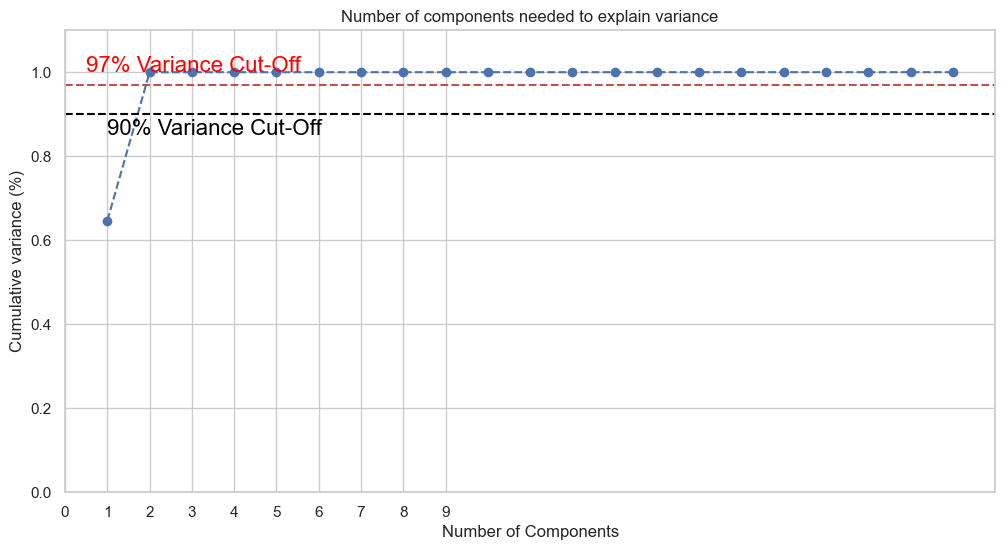

In [179]:
pca = PCA().fit(x)

sns.set(style = 'whitegrid')
plt.rcParams["figure.figsize"] = (12,6)

fig, ax = plt.subplots()
xi = np.arange(1, 22, step=1)
y = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 10, step=1))
plt.ylabel('Cumulative variance (%)')
plt.title('Number of components needed to explain variance')

plt.axhline(y=0.97, color='r', linestyle='--')
plt.axhline(y=0.9, color='black', linestyle='--')
plt.text(0.5, 1, '97% Variance Cut-Off', color = 'red', fontsize=16)
plt.text(1, 0.85, '90% Variance Cut-Off', color = 'black', fontsize=16)
plt.show()

Number of components according to pca is 2

 # Divide the data into training, validation, and testing sets

In [52]:
from sklearn.model_selection import train_test_split, GridSearchCV
x_train_val,x_test,y_train_val,y_test= train_test_split(x,y,random_state=42,test_size=.2)
x_train,x_val,y_train,y_val= train_test_split(x_train_val,y_train_val,random_state=42,test_size=.25)

In [53]:
print(f'Train set size: {len(x_train)}')
print(f'Validation set size: {len(x_val)}')
print(f'Test set size: {len(x_test)}')

Train set size: 60000
Validation set size: 20000
Test set size: 20000


In [54]:
#Do Standard scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()


In [55]:
cat_cols = data_copy.select_dtypes(include = ['float64','int64']).columns
cat_cols = cat_cols.drop(['Monthly_Inhand_Salary','Amount_invested_monthly'])
print(cat_cols)

Index(['Month', 'Age', 'Annual_Income', 'Num_Bank_Accounts', 'Num_Credit_Card',
       'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date',
       'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio',
       'Credit_History_Age', 'Total_EMI_per_month', 'Monthly_Balance'],
      dtype='object')


In [56]:
x_train_sc = x_train.copy()
x_val_sc = x_val.copy()
x_test_sc = x_test.copy()

x_train_sc[cat_cols] = sc.fit_transform(x_train[cat_cols])
x_val_sc[cat_cols] = sc.fit_transform(x_val[cat_cols])
x_test_sc[cat_cols] = sc.fit_transform(x_test[cat_cols])


### Find Importance of each feature

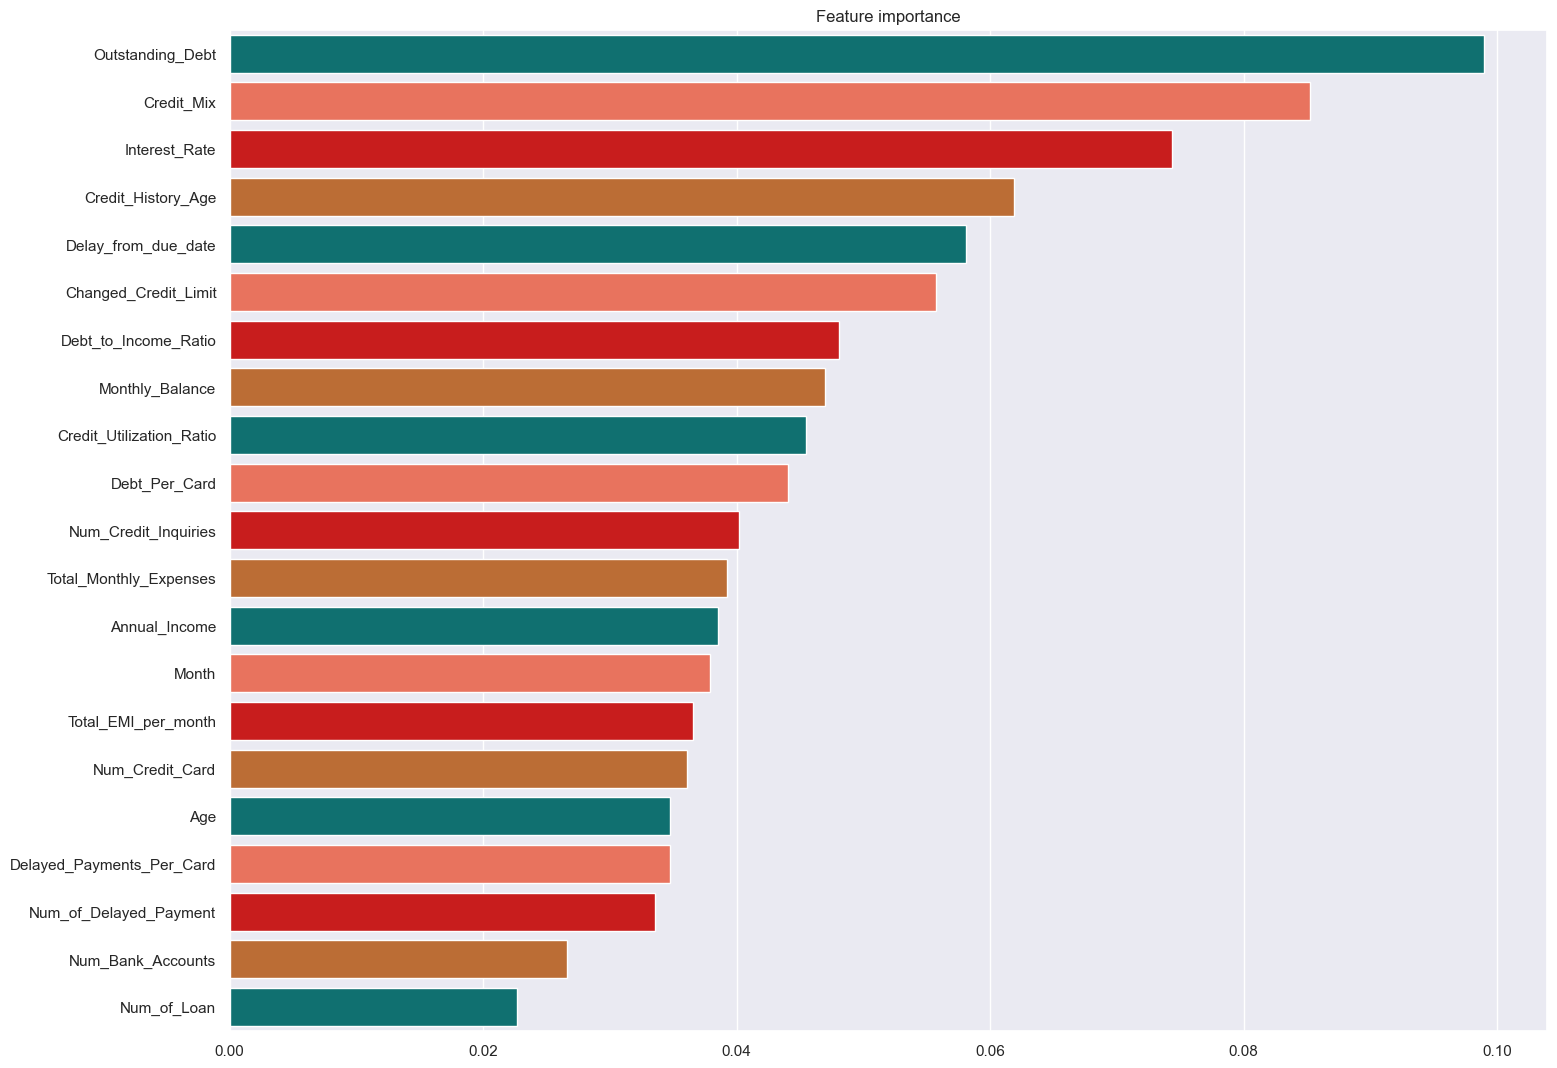

In [57]:
from sklearn.ensemble import RandomForestClassifier
palette = ['#008080','#FF6347', '#E50000', '#D2691E'] # Creating color palette for plots

clf = RandomForestClassifier(n_estimators=300, random_state=42)
clf = clf.fit(x_train, y_train)

fimp = pd.Series(data=clf.feature_importances_, index=x_train.columns).sort_values(ascending=False)
plt.figure(figsize=(17,13))
plt.title("Feature importance")
ax = sns.barplot(y=fimp.index, x=fimp.values, palette=palette, orient='h')

'Outstanding_Debt','Credit_Mix','Interest_Rate','Credit_History_Age','Delay_from_due_date','Changed_Credit_Limit','Monthly_Balance','Credit_Utilization_Ratio','Num_Credit_Inquiries','Month','Num_Credit_Card','Annual_Income','Total_EMI_per_month','Num_of_Delayed_Payment','Age','Num_Bank_Accounts','Num_of_Loan','Debt_to_Income_Ratio','Debt_Per_Card','Delayed_Payments_Per_Card','Total_Monthly_Expenses' These are the important features.


In [58]:
features = ['Outstanding_Debt','Credit_Mix','Interest_Rate','Credit_History_Age','Delay_from_due_date','Changed_Credit_Limit','Monthly_Balance','Credit_Utilization_Ratio','Num_Credit_Inquiries','Month','Num_Credit_Card','Annual_Income','Total_EMI_per_month','Num_of_Delayed_Payment','Age','Num_Bank_Accounts','Num_of_Loan','Debt_to_Income_Ratio','Debt_Per_Card','Delayed_Payments_Per_Card','Total_Monthly_Expenses']
x_train_f = x_train[features]
x_val_f = x_val[features]
x_test_f = x_test[features]

# Classification Models

# 1.Random Forest

In [186]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=300, class_weight='balanced')


In [187]:
model.fit(x_train_f, y_train)


RandomForestClassifier(class_weight='balanced', n_estimators=300)

#### Validate the model

In [188]:
val_predictions = model.predict(x_val_f)


In [66]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix


In [192]:
print('Classification Report', classification_report(y_val, val_predictions))
print('\n')
print('Confusion Matrix', confusion_matrix(y_val, val_predictions))
print('\n')
print('Accuracy Score', accuracy_score(y_val, val_predictions))

Classification Report               precision    recall  f1-score   support

           0       0.80      0.83      0.81      5708
           1       0.84      0.82      0.83     10767
           2       0.78      0.78      0.78      3525

    accuracy                           0.82     20000
   macro avg       0.81      0.81      0.81     20000
weighted avg       0.82      0.82      0.82     20000



Confusion Matrix [[4716  970   22]
 [1162 8873  732]
 [  25  757 2743]]


Accuracy Score 0.8166


#### Test the model

In [191]:
# Test the model
test_predictions = model.predict(x_test_f)

In [193]:
print('Classification Report', classification_report(y_test, test_predictions))
print('\n')
print('Confusion Matrix', confusion_matrix(y_test, test_predictions))
print('\n')
print('Accuracy Score', accuracy_score(y_test, test_predictions))

Classification Report               precision    recall  f1-score   support

           0       0.81      0.85      0.83      5874
           1       0.84      0.83      0.83     10599
           2       0.79      0.77      0.78      3527

    accuracy                           0.82     20000
   macro avg       0.82      0.81      0.81     20000
weighted avg       0.82      0.82      0.82     20000



Confusion Matrix [[4968  877   29]
 [1140 8786  673]
 [  18  799 2710]]


Accuracy Score 0.8232


In [194]:
result = pd.DataFrame({'Model': ['Random Forest'], 'Accuracy':[accuracy_score(y_test, test_predictions)]})


In [195]:
#Using scaled data
model.fit(x_train_sc, y_train)
val_predictions_sc = model.predict(x_val_sc)
print('Classification Report', classification_report(y_val, val_predictions_sc))
print('\n')
print('Confusion Matrix', confusion_matrix(y_val, val_predictions_sc))
print('\n')
print('Accuracy Score', accuracy_score(y_val, val_predictions_sc))

Classification Report               precision    recall  f1-score   support

           0       0.80      0.83      0.82      5708
           1       0.84      0.83      0.83     10767
           2       0.79      0.77      0.78      3525

    accuracy                           0.82     20000
   macro avg       0.81      0.81      0.81     20000
weighted avg       0.82      0.82      0.82     20000



Confusion Matrix [[4754  930   24]
 [1159 8899  709]
 [  26  800 2699]]


Accuracy Score 0.8176


In [196]:
test_predictions_sc = model.predict(x_test_sc)
print('Classification Report', classification_report(y_test, test_predictions_sc))
print('\n')
print('Confusion Matrix', confusion_matrix(y_test, test_predictions_sc))
print('\n')
print('Accuracy Score', accuracy_score(y_test, test_predictions_sc))

Classification Report               precision    recall  f1-score   support

           0       0.81      0.83      0.82      5874
           1       0.83      0.83      0.83     10599
           2       0.80      0.76      0.78      3527

    accuracy                           0.82     20000
   macro avg       0.81      0.81      0.81     20000
weighted avg       0.82      0.82      0.82     20000



Confusion Matrix [[4902  946   26]
 [1165 8771  663]
 [  17  813 2697]]


Accuracy Score 0.8185


# 2.logistic regression model

In [197]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(solver='lbfgs', max_iter=1000)


In [199]:
log_reg.fit(x_train_f,y_train)


LogisticRegression(max_iter=1000)

In [200]:
y_log_pred_val = log_reg.predict(x_val_f)
y_log_pred_test = log_reg.predict(x_test_f)

In [201]:
print('Classification Report', classification_report(y_val, y_log_pred_val))
print('\n')
print('Confusion Matrix', confusion_matrix(y_val, y_log_pred_val))
print('\n')
print('Accuracy Score', accuracy_score(y_val, y_log_pred_val))

Classification Report               precision    recall  f1-score   support

           0       0.64      0.46      0.54      5708
           1       0.62      0.80      0.70     10767
           2       0.57      0.31      0.41      3525

    accuracy                           0.62     20000
   macro avg       0.61      0.53      0.55     20000
weighted avg       0.62      0.62      0.60     20000



Confusion Matrix [[2653 2901  154]
 [1425 8666  676]
 [  49 2367 1109]]


Accuracy Score 0.6214


In [202]:
print('Classification Report', classification_report(y_test, y_log_pred_test))
print('\n')
print('Confusion Matrix', confusion_matrix(y_test, y_log_pred_test))
print('\n')
print('Accuracy Score', accuracy_score(y_test, y_log_pred_test))

Classification Report               precision    recall  f1-score   support

           0       0.64      0.47      0.54      5874
           1       0.61      0.80      0.69     10599
           2       0.56      0.31      0.40      3527

    accuracy                           0.61     20000
   macro avg       0.61      0.52      0.54     20000
weighted avg       0.61      0.61      0.60     20000



Confusion Matrix [[2739 2971  164]
 [1463 8448  688]
 [  48 2389 1090]]


Accuracy Score 0.61385


In [203]:
result2 = pd.DataFrame({'Model': ['Logistic Regression'], 'Accuracy':[accuracy_score(y_test, y_log_pred_test)]})


# 3.KNN model

In [204]:
from sklearn.neighbors import KNeighborsClassifier
metric_k = []
metric_k_val = []

neighbors = np.arange(3,15)

In [205]:
for k in neighbors:
  classifier = KNeighborsClassifier(n_neighbors=k,metric='minkowski',p=2)
  classifier.fit(x_train_f,y_train)
  y_pred_knn_val = classifier.predict(x_val_f)
  accuracy_val= accuracy_score(y_val,y_pred_knn_val)
  metric_k_val.append(accuracy_val)
  y_pred_knn_test = classifier.predict(x_test_f)
  accuracy_test= accuracy_score(y_test,y_pred_knn_test)
  metric_k.append(accuracy_test)

Text(0, 0.5, 'accuracy')

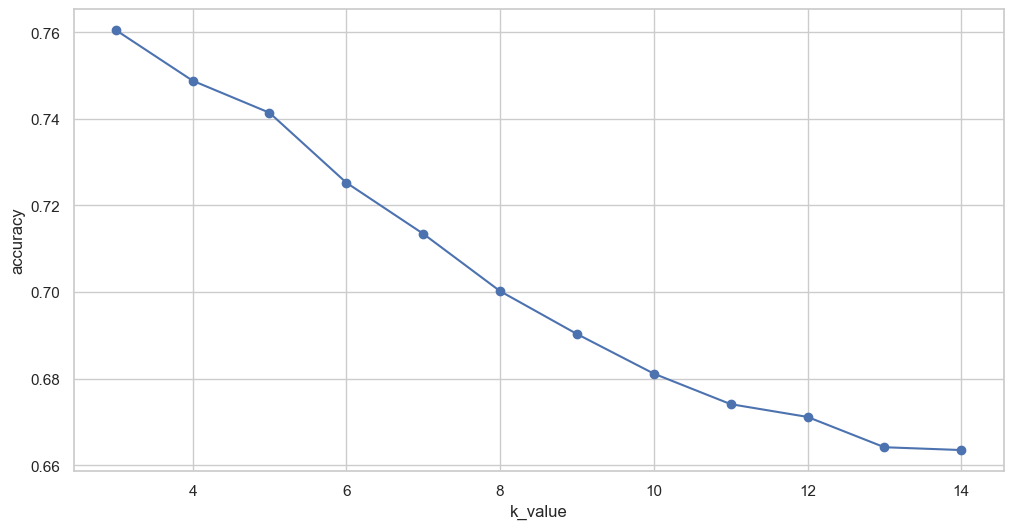

In [206]:
plt.plot(neighbors,metric_k_val,'o-')
plt.xlabel('k_value')
plt.ylabel('accuracy')

In [207]:
classifier = KNeighborsClassifier(n_neighbors=3,metric='minkowski',p=2) #3 is the highest data point
classifier.fit(x_train_f,y_train)
y_pred_knn_val = classifier.predict(x_val_f)


In [208]:
print('Classification Report', classification_report(y_val, y_pred_knn_val))
print('\n')
print('Confusion Matrix', confusion_matrix(y_val, y_pred_knn_val))
print('\n')
print('Accuracy Score', accuracy_score(y_val, y_pred_knn_val))

Classification Report               precision    recall  f1-score   support

           0       0.74      0.79      0.77      5708
           1       0.79      0.77      0.78     10767
           2       0.69      0.68      0.68      3525

    accuracy                           0.76     20000
   macro avg       0.74      0.75      0.74     20000
weighted avg       0.76      0.76      0.76     20000



Confusion Matrix [[4514 1143   51]
 [1440 8305 1022]
 [ 129 1005 2391]]


Accuracy Score 0.7605


Text(0, 0.5, 'accuracy')

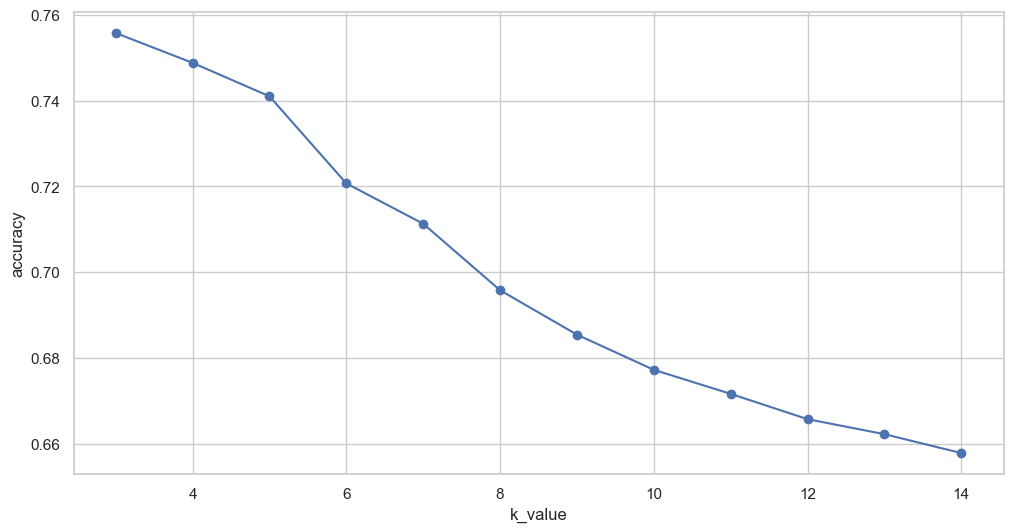

In [209]:
plt.plot(neighbors,metric_k,'o-')
plt.xlabel('k_value')
plt.ylabel('accuracy')

In [210]:
classifier = KNeighborsClassifier(n_neighbors=3,metric='minkowski',p=2) #3 is the highest data point
classifier.fit(x_train_f,y_train)
y_pred_knn = classifier.predict(x_test_f)


In [211]:
print('Classification Report', classification_report(y_test, y_pred_knn))
print('\n')
print('Confusion Matrix', confusion_matrix(y_test, y_pred_knn))
print('\n')
print('Accuracy Score', accuracy_score(y_test, y_pred_knn))

Classification Report               precision    recall  f1-score   support

           0       0.75      0.79      0.77      5874
           1       0.78      0.76      0.77     10599
           2       0.69      0.67      0.68      3527

    accuracy                           0.76     20000
   macro avg       0.74      0.74      0.74     20000
weighted avg       0.76      0.76      0.76     20000



Confusion Matrix [[4629 1195   50]
 [1459 8107 1033]
 [ 100 1048 2379]]


Accuracy Score 0.75575


In [212]:
result3 = pd.DataFrame({'Model': ['KNN'], 'Accuracy':[accuracy_score(y_test, y_pred_knn)]})


# 4.XGB

In [214]:
from xgboost import XGBClassifier

# Initialize the XGBoost classifier
model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss')

# Train the model
model.fit(x_train_f, y_train, eval_set=[(x_val_f, y_val)], early_stopping_rounds=10, verbose=False)

# Validate the model
val_predictions = model.predict(x_val_f)
val_accuracy = accuracy_score(y_val, val_predictions)
print(f'Validation Accuracy: {val_accuracy:.2f}')

# Test the model
test_predictions = model.predict(x_test_f)
test_accuracy = accuracy_score(y_test, test_predictions)
print(f'Test Accuracy: {test_accuracy:.2f}')

Validation Accuracy: 0.77
Test Accuracy: 0.78


In [215]:
result4 = pd.DataFrame({'Model': ['XGB'], 'Accuracy':[accuracy_score(y_test, test_predictions)]})


# 5.Bagging Classifier

In [67]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

# Initialize base estimator
base_estimator = DecisionTreeClassifier()

# Initialize Bagging Classifier with base estimator
bagging_clf = BaggingClassifier(estimator=base_estimator, n_estimators=200, random_state=42)

# Train Bagging Classifier
bagging_clf.fit(x_train_f, y_train)
# Validate model
y_pred_val = bagging_clf.predict(x_val_f)

# Make predictions
y_pred = bagging_clf.predict(x_test_f)

# Evaluate accuracy
accuracy_val = accuracy_score(y_val, y_pred_val)
print(f'Accuracy of validation: {accuracy_val:.2f}')
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy of validation: 0.82
Accuracy: 0.82


In [228]:
result5 = pd.DataFrame({'Model': ['BaggingClassifier'], 'Accuracy':[accuracy]})


# 6.Decision Tree

In [219]:
from sklearn.tree import DecisionTreeClassifier

# Define the parameter grid
param_grid = {
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2'],
    'criterion': ['gini', 'entropy']
}

# Initialize the classifier
dt_clf = DecisionTreeClassifier(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=dt_clf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=1)

# Fit GridSearchCV
grid_search.fit(x_train_f, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best parameters:", best_params)

# Predict with the best estimator
best_dt_clf = grid_search.best_estimator_
y_pred_tree = best_dt_clf.predict(x_test_f)

Fitting 5 folds for each of 270 candidates, totalling 1350 fits
Best parameters: {'criterion': 'entropy', 'max_depth': None, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [224]:
print('Classification Report', classification_report(y_test, y_pred_tree))
print('\n')
print('Confusion Matrix', confusion_matrix(y_test, y_pred_tree))
print('\n')
print('Accuracy Score', accuracy_score(y_test, y_pred_tree))
accuracy_dt = accuracy_score(y_test, y_pred_tree)

Classification Report               precision    recall  f1-score   support

           0       0.74      0.73      0.74      5874
           1       0.77      0.78      0.78     10599
           2       0.71      0.69      0.70      3527

    accuracy                           0.75     20000
   macro avg       0.74      0.73      0.74     20000
weighted avg       0.75      0.75      0.75     20000



Confusion Matrix [[4309 1457  108]
 [1414 8279  906]
 [  90 1003 2434]]


Accuracy Score 0.7511


In [225]:
result6 = pd.DataFrame({'Model': ['Decision Tree'], 'Accuracy':[accuracy_dt]})


In [229]:
# Append all result values
frames = [result, result2, result3,result4,result5,result6]
results = pd.concat(frames,ignore_index=True)
results

,Model,Accuracy
0,Random Forest,0.82320
1,Logistic Regression,0.61385
2,KNN,0.75575
3,XGB,0.77545
4,BaggingClassifier,0.82145
5,Decision Tree,0.75110


## Conclusion
####  models performance evaluated.Random forest and bagging classifier show high performance with accuracy .82. Scaling reduces the performance.

# Hyper Parameter Tuning

In [230]:
from sklearn.model_selection import RandomizedSearchCV

In [273]:
# Define the parameter grid
param_grid = {
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2'],
    'criterion': ['gini', 'entropy']
}

# Initialize the RandomForest model
rf_model = RandomForestClassifier()

# Use RandomizedSearchCV for hyperparameter tuning
random_search = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=param_grid,
    n_iter=100,  # Number of parameter settings sampled
    cv=3,  # 3-fold cross-validation
    verbose=2,
    random_state=42,
    n_jobs=-1  # Use all available cores
)

# Fit the model
random_search.fit(x_train_f, y_train)

# Get the best model
best_rf_model = random_search.best_estimator_

# Print the best parameters
print("Best parameters found: ", random_search.best_params_)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best parameters found:  {'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': None, 'criterion': 'gini'}


In [277]:
y_pred_random = best_rf_model.predict(x_test_f)
accuracy = accuracy_score(y_test, y_pred_random)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.82


In [259]:
# Define the parameter grid for BaggingClassifier
param_grid = {
    'estimator__max_depth': [3, 5, 7, 10, None],
    'n_estimators': [10, 50, 100, 200],
    'max_samples': [0.5, 0.7, 1.0],
    'max_features': [0.5, 0.7, 1.0],
    'bootstrap': [True, False],
    'bootstrap_features': [True, False]
}

# Initialize the BaggingClassifier with a base estimator
base_estimator = DecisionTreeClassifier()
bagging_model = BaggingClassifier(estimator=base_estimator)

# Use RandomizedSearchCV for hyperparameter tuning
random_search = RandomizedSearchCV(
    estimator=bagging_model,
    param_distributions=param_grid,
    n_iter=100,  # Number of parameter settings sampled
    cv=3,  # 3-fold cross-validation
    verbose=2,
    random_state=42,
    n_jobs=-1  # Use all available cores
)

# Fit the model
random_search.fit(x_train_f, y_train)

# Get the best model
best_bagging_model = random_search.best_estimator_

# Print the best parameters
print("Best parameters found: ", random_search.best_params_)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best parameters found:  {'n_estimators': 100, 'max_samples': 1.0, 'max_features': 0.7, 'estimator__max_depth': None, 'bootstrap_features': False, 'bootstrap': False}


In [263]:
#Apply best parameters

# Initialize base estimator
base_estimator = DecisionTreeClassifier(max_depth=None, random_state=42)

# Initialize Bagging Classifier with base estimator
bagging_clf = BaggingClassifier(estimator=base_estimator, n_estimators=100, max_samples=1.0,max_features=0.7,
                                bootstrap_features=False, bootstrap=False, random_state=42)

# Train Bagging Classifier
bagging_clf.fit(x_train_f, y_train)
# Validate model
y_pred_val = bagging_clf.predict(x_val_f)

# Make predictions
y_pred = bagging_clf.predict(x_test_f)

# Evaluate accuracy
accuracy_val = accuracy_score(y_val, y_pred_val)
print(f'Accuracy of validation: {accuracy_val:.2f}')
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy of validation: 0.83
Accuracy: 0.83


In [278]:
print('Classification Report', classification_report(y_test, y_pred))
print('\n')
print('Confusion Matrix', confusion_matrix(y_test, y_pred))
print('\n')
print('Accuracy Score', accuracy_score(y_test, y_pred))

Classification Report               precision    recall  f1-score   support

           0       0.82      0.85      0.84      5874
           1       0.85      0.84      0.84     10599
           2       0.81      0.79      0.80      3527

    accuracy                           0.83     20000
   macro avg       0.83      0.83      0.83     20000
weighted avg       0.83      0.83      0.83     20000



Confusion Matrix [[5012  849   13]
 [1097 8853  649]
 [   6  734 2787]]


Accuracy Score 0.8326


### Hyper parameter tuning done for Random forest and Bagging classifier.
### Accuracy for Random forest:.82 and Bagging classifier: .83

### Bagging classifier gives high accuracy of .83 for best parameters.

# Cross validation

In [68]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
skf = StratifiedKFold(n_splits=5)

In [73]:
x_cv = data[features]
cv_scores = cross_val_score(bagging_clf,x_cv, y, cv=skf)
print(f'Mean value from cross-validation: {cv_scores.mean()}')
print(f'Standard Deviation of values: {cv_scores.std()}')


Mean value from cross-validation: 0.6937300000000001
Standard Deviation of values: 0.005283994700981414


In [79]:
print(cv_scores)

[0.6852  0.69805 0.69635 0.69005 0.699  ]


## Threshold selection

Plot ROC curve for multi class classification

In [241]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
# Binarize the output
y_train_bin = label_binarize(y_train, classes=[0, 1, 2])
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])

In [242]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the model
random = RandomForestClassifier(
    bootstrap=False,
    max_depth=None,
    min_samples_leaf=1,
    min_samples_split=2,
    n_estimators=200
)
random.fit(x_train_f, y_train)

# Predicted probabilities for each class
y_pred_proba = random.predict_proba(x_test_f)

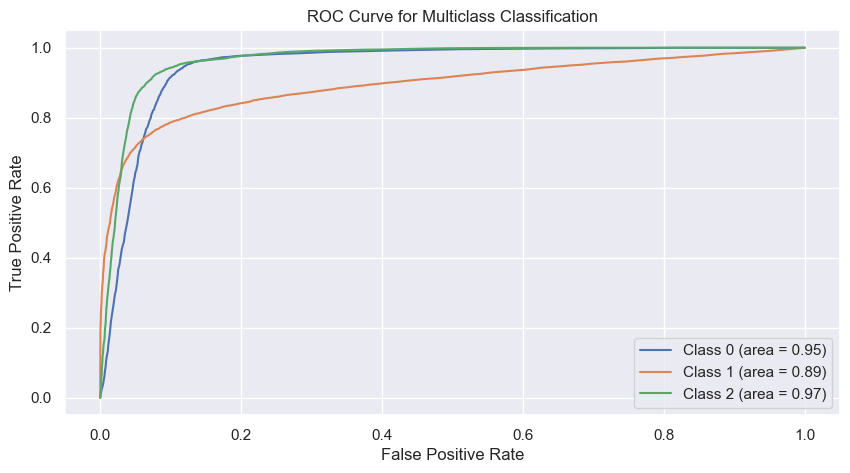

In [89]:
# Plot ROC curve for each class
plt.figure(figsize=(10, 5))

for i in range(y_test_bin.shape[1]):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_pred_proba[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label='Class %d (area = %0.2f)' % (i, roc_auc))

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multiclass Classification')
plt.legend(loc="lower right")
plt.show()

In [243]:
# Compute ROC curve and ROC area for each class
fpr, tpr, thresholds_roc = roc_curve(y_test_bin.ravel(), y_pred_proba.ravel())

In [244]:
import numpy as np

# Calculate the Youden's J statistic for each threshold
J = tpr - fpr
optimal_idx = np.argmax(J)
optimal_threshold = thresholds_roc[optimal_idx]

print("Optimal Threshold: ", optimal_threshold)


Optimal Threshold:  0.35


Plot the ROC curve with the optimal threshold:

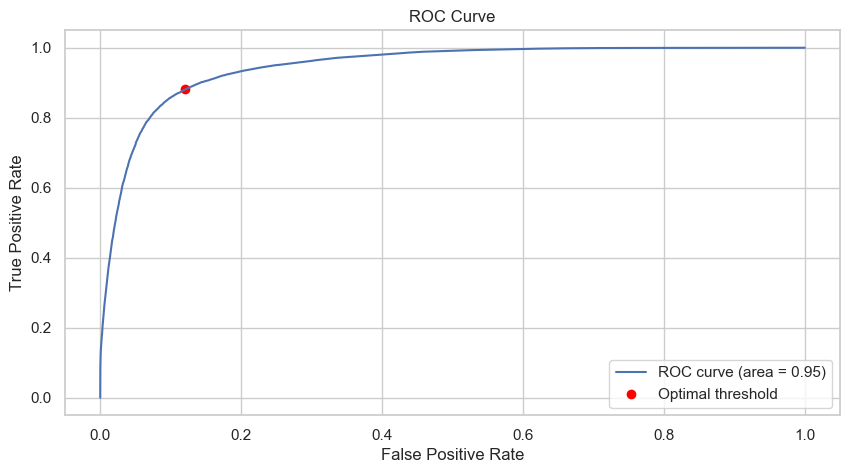

In [245]:
# Plot the ROC curve
plt.figure(figsize=(10, 5))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc(fpr, tpr))
plt.scatter(fpr[optimal_idx], tpr[optimal_idx], color='red', label='Optimal threshold')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

Threshold selection for Bagging classifier

In [251]:
from sklearn.ensemble import BaggingClassifier
# Initialize base estimator
base_estimator = DecisionTreeClassifier()

# Initialize Bagging Classifier with base estimator
bagging_clf = BaggingClassifier(estimator=base_estimator, n_estimators=200, random_state=42)

# Train Bagging Classifier
bagging_clf.fit(x_train[features], y_train)



# Predicted probabilities for each class
y_pred_proba_b = bagging_clf.predict_proba(x_test_f)

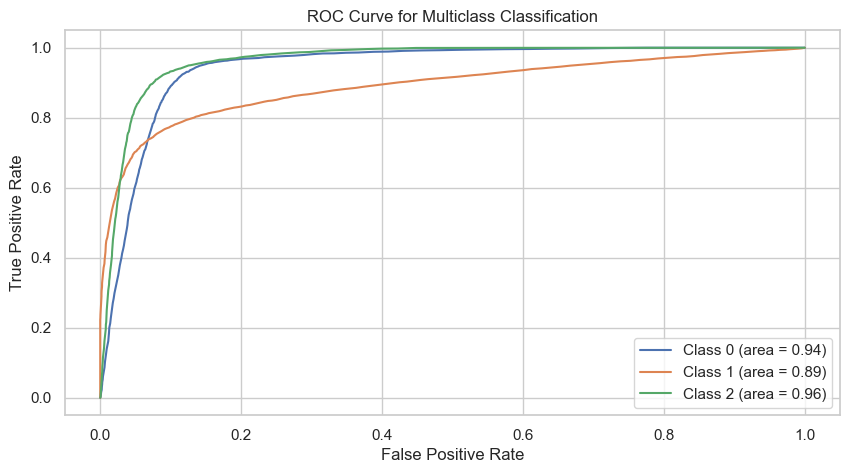

In [252]:
# Plot ROC curve for each class
plt.figure(figsize=(10, 5))

for i in range(y_test_bin.shape[1]):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_pred_proba_b[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label='Class %d (area = %0.2f)' % (i, roc_auc))

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multiclass Classification')
plt.legend(loc="lower right")
plt.show()

In [253]:
# Compute ROC curve and ROC area for each class
fpr, tpr, thresholds_roc = roc_curve(y_test_bin.ravel(), y_pred_proba_b.ravel())

In [254]:
import numpy as np

# Calculate the Youden's J statistic for each threshold
J = tpr - fpr
optimal_idx = np.argmax(J)
optimal_threshold = thresholds_roc[optimal_idx]

print("Optimal Threshold: ", optimal_threshold)


Optimal Threshold:  0.375


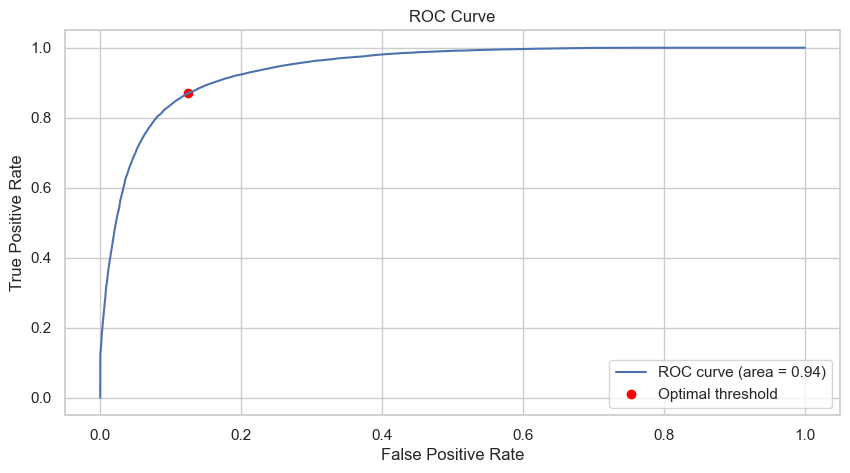

In [255]:
# Plot the ROC curve
plt.figure(figsize=(10, 5))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc(fpr, tpr))
plt.scatter(fpr[optimal_idx], tpr[optimal_idx], color='red', label='Optimal threshold')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

### Conclusion
#### ROC Curve plotted for Random forest and Bagging classifier . These two are performed almost same. AUC is 94%. It is good value. So these models are performing well.

#### To reduce the file size when saving the model, I opted to use a Bagging Classifier instead of a Random Forest, as the latter resulted in a file size of 450MB when pickled. Additionally, the Bagging Classifier demonstrated higher accuracy in predictions.


In [296]:
import pickle

with open('model_bagging.pkl', 'wb') as file:
    pickle.dump(bagging_clf,file)

In [78]:
#Checking model
predicted_score = bagging_clf.predict([['809.98', '2' ,'3.0', '265.0' ,'3' ,'11.27', '312.49' ,'26.82', '4', '1', '4',
  '19114.66', '49.57', '7', '23' ,'3', '4' ,'0.04237480551576643', '202.495',
  '1.75' ,'71.035']])
print(predicted_score[0])

2
